# NOVA IMS
## EDSA: Data Science and Machine Learning

## __Unsupervised Project: Group 15__

<a id='indi'></a>
### Index
* [1. Import Data](#import) <br>
* [2. Exploring Data](#exploration) <br>
    * [2.1. Checking Database's Basics](#basics)<br>
    * [2.2. Statistical Exploration](#statistical)<br>
         * [2.2.1. Numerical Varibles](#numerical)<br>
         * [2.2.2. Categorical Varibles](#categorical)<br>
    * [2.3. Deeper Exploration](#deep)<br>
* [3. Data Visualization](#visualize) <br>    
* [4. Preprocess](#preprocess) <br>
    * [4.1. Data Cleaning](#cleaning) <br>  
        * [4.1.1. Misclassifications](#misclass) <br>
        * [4.1.2. Incoherences](#incoh) <br>
    * [4.2 Data Transformation](#transformation) <br>
        * [4.2.1. New Variables](#newvar)<br>
        * [4.2.2. Missing Values](#missing)<br>
        * [4.2.3. Binning](#bins)<br>
        * [4.2.4. Scalling](#scale)<br>
        * [4.2.5. Data Reduction](#reduction)<br>
* [5. Clustering](#cluster) <br> 
    * [5.1 Perspectives](#perspectives)<br>
        * [5.1.1. Customer ID Pespective](#customer)<br>
        * [5.1.2. Survey perspective](#survey)<br>
        * [5.1.3. Join both perspectives](#join_perspectives)<br>
    * [5.2. Clustering Analysis](#cluster2)<br>
        * [5.2.1. Clustering Clients](#clusterclients)<br>
        * [5.2.2. Clustering Survey](#clustersurvey)<br>
    * [5.3. Other Clustering Techniques](#cluster3)<br>
        * [5.3.1. Ward Method](#cluster4)<br>
    * [5.4. Principal Component Analysis](#pca)<br>




[BACK TO ÍNDICE](#indi)

<a id='import'></a>
# 1. Import Data and Packages
> __Step 1:__ Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

> __Step 2:__ Set ID

In [2]:
df = pd.read_csv('cluster.csv')
df.index.name = 'BookingID' # set variable Name as the index of the dataframe
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


> __Step 3:__ Remove Duplicates

In [3]:
df[df.duplicated(keep = False)]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
8194,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
8195,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9175,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9176,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9416,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1
9417,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [4]:
df.drop_duplicates(inplace = True)
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


[BACK TO ÍNDICE](#indi)

<a id='exploration'></a>
## 2. Data Exploration

<a id='basics'></a>
### 2.1 Checking Dataframe's Basics

In [5]:
df.shape

(15586, 21)

In [6]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

Only the column Year_Birth has NaN values. All variables from the survey are integers, the year of birth is a float and the remaining variables are objects.

[BACK TO ÍNDICE](#indi)

<a id='statistical'></a>
### 2.2 Statistical Exploration

<a id='numerical'></a>
#### 2.2.1. Numerical Variables

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


The Year_Birth variable has a maximum value of 2014 which might indicate a problem with that particular entry, because it would mean that a 8 year old would have done the booking.
RewardsPoints' standard deviation is substantially larger than for the remaining variables due to it's scale (range).Therefore this variable must be standardized before applying the kmeans algorithm.
The Wifi variable has a maximum value of 6 which is an error because the maximum value allowed by the survey was a 5.

What to fix:
- Missing Values on __Year_Birth__;
- __Reward Points__ and __Year_Birth__ scale; 
- Possible Incoherene with __Wifi's__ evaluation (6);
- 2014 as a possible __Year_Birth__?

In [9]:
df.skew()

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_26287/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort             -0.100806
ReceptionSchedule   -0.260518
FoodDrink           -0.123543
Location            -0.050057
Wifi                -0.171105
Amenities           -0.599424
Staff               -0.554468
OnlineBooking       -0.472109
PriceQuality        -0.503290
RoomSpace           -0.482872
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.358340
dtype: float64

How to interpret the skewness:
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed.


Amenities, Staff, PriceQuality, CheckOut and Cleanliness appear to have a moderate negative skewness.

In [10]:
df.kurt()

/var/folders/hs/t_th7f6j6tsb1fg2d7_808y80000gn/T/ipykernel_26287/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Year_Birth          -0.729844
RewardPoints         0.260162
Comfort             -0.935490
ReceptionSchedule   -1.077415
FoodDrink           -0.967006
Location            -1.076634
Wifi                -1.111382
Amenities           -0.540790
Staff               -0.859138
OnlineBooking       -0.931961
PriceQuality        -0.772889
RoomSpace           -0.864568
CheckOut            -0.225208
Checkin             -0.812148
Cleanliness         -0.225374
BarService          -0.949633
dtype: float64

Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0. Along with skewness, kurtosis is an important descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.
- High kurtosis in a data set is an indicator that data has heavy outliers.
- Low kurtosis in a data set is an indicator that data has lack of outliers.

The variable with the highest kurtosis are ReceptionSchedule, Location, Wifi. RewardPoints variable has a positive kurtosis while its skewness statistic was negative.

<a id='categorical'></a>
#### 2.2.2. Categorical Variables

In [11]:
df.describe(include = ['O']) # incluir as variáveis categóricas no describe

,Churn,Name,Longevity,TypeTravel,RoomType
count,15586,15586,15586,15586,15586
unique,2,14227,3,2,3
top,nochurn,Mr. Michael Smith,yes,business,single
freq,8475,9,12545,10754,7442


All categorical variable have no NaN values. 
There are 14.227 unique clients in the booking dataset, and the client that has used the Book Me services more often was Mr. Michael Smith with 9 bookings.
We have a problem with the Longevity variable, since it is a binary variable (yes or no) and there are 3 unique values in that variable.
It appears that the most common TypeTravel is the business travel and the RoomType that is booked the most is the single room.
Below we will inspect every variable in the dataset individually.

In [12]:
df['Churn'].value_counts()

nochurn    8475
churn      7111
Name: Churn, dtype: int64

No problems with this variable, we only need to turn it into a flag.

In [13]:
df['Name'].value_counts()

Mr. Michael Smith     9
Mr. John Smith        7
Ms. Amanda Smith      7
Mr. Michael Davis     6
Ms. Jennifer Smith    6
                     ..
Ms. Laurie Smith      1
Mr. Aaron Cox         1
Ms. Natasha Estes     1
Ms. Beverly Lee       1
Mr. Steven Mendez     1
Name: Name, Length: 14227, dtype: int64

Use this variable to create a new variable called Gender and then turn it into a flag.

In [14]:
df['Longevity'].value_counts()

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

Transform the "y" into "yes". Then transform the variable into a flag.

In [15]:
df['Year_Birth'].value_counts(ascending = True)

1936.0      2
1942.0      3
1943.0      6
1945.0      8
1947.0      9
         ... 
1981.0    369
1998.0    380
1980.0    383
1996.0    416
1982.0    441
Name: Year_Birth, Length: 75, dtype: int64

Needs further investigation to know what to do with the entries made by children.

In [16]:
df['TypeTravel'].value_counts(normalize=True)

business    0.689978
leisure     0.310022
Name: TypeTravel, dtype: float64

No problems with this variable. Needs to be turned into a flag.

In [17]:
df['RoomType'].value_counts(normalize=True)

single    0.47748
double    0.45034
suite     0.07218
Name: RoomType, dtype: float64

No problems with this variable. Needs to be turned into a flag. To do that we must encode the variable into 2 columns.

In [18]:
df['RewardPoints'].value_counts()

5286    19
5010    17
5094    16
4942    16
5347    16
        ..
6666     1
3927     1
1766     1
4706     1
3304     1
Name: RewardPoints, Length: 4061, dtype: int64

This variable has a very high range and it must be normalized.

In [19]:
df['Wifi'].value_counts(ascending = True)

0      18
6      36
1    1792
2    3245
3    3347
5    3445
4    3703
Name: Wifi, dtype: int64

There are 36 input values with 6 selected. This value is not a valied and must be transformed into a number from 0 to 5.

In [20]:
df['Comfort'].value_counts(ascending = True)
df['ReceptionSchedule'].value_counts(ascending = True)
df['FoodDrink'].value_counts(ascending = True)
df['Location'].value_counts(ascending = True)
df['Amenities'].value_counts(ascending = True)
df['Staff'].value_counts(ascending = True)
df['OnlineBooking'].value_counts(ascending = True)
df['PriceQuality'].value_counts(ascending = True)
df['RoomSpace'].value_counts(ascending = True)
df['CheckOut'].value_counts(ascending = True)
df['Checkin'].value_counts(ascending = True)
df['Cleanliness'].value_counts(ascending = True)
df['BarService'].value_counts(ascending = True)

0       2
1    1845
2    2272
5    3591
3    3675
4    4201
Name: BarService, dtype: int64

No problems with these variables.

[BACK TO ÍNDICE](#indi)

<a id='visualize'></a>
## 3. Data Visualization

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

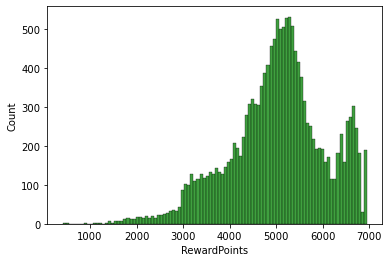

In [21]:
sns.histplot(df['RewardPoints'], color = 'g', bins = 100)

<AxesSubplot:xlabel='Year_Birth', ylabel='RewardPoints'>

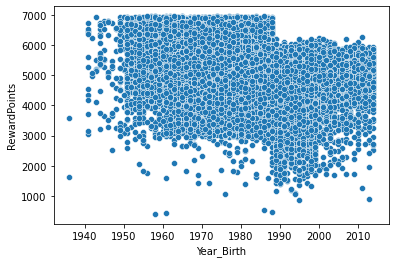

In [22]:
sns.scatterplot(x = 'Year_Birth', y = 'RewardPoints', data = df)

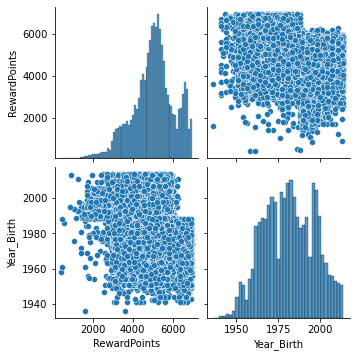

In [23]:
df_subset = df[['RewardPoints', 'Year_Birth']].copy()
sns.pairplot(df_subset)

<AxesSubplot:>

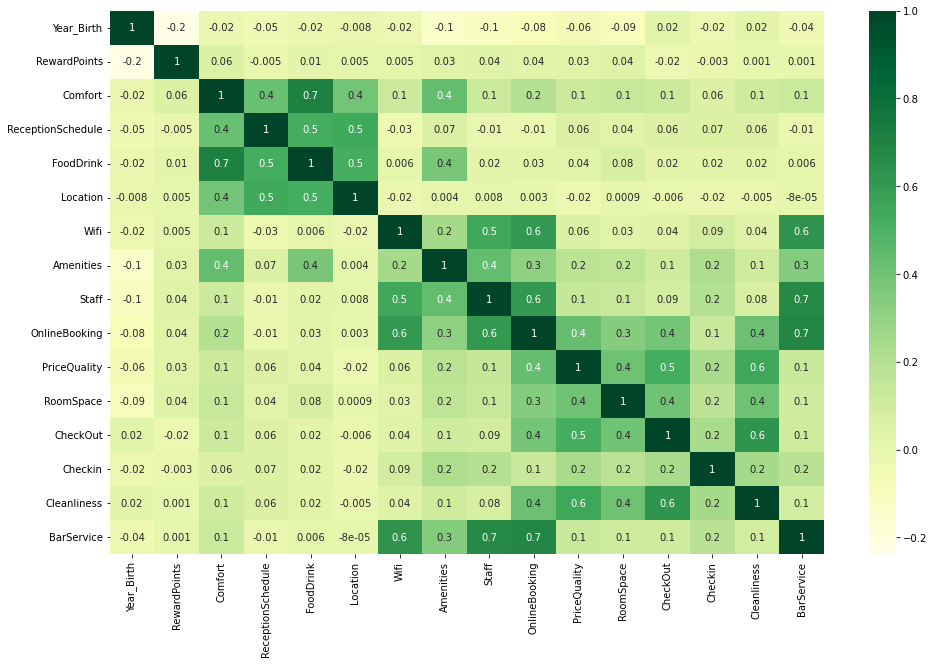

In [24]:
df_corr = df.corr(method = 'pearson')
figure = plt.figure(figsize = (16, 10))
sns.heatmap(df_corr, cmap = 'YlGn',annot = True, fmt = '.1g')

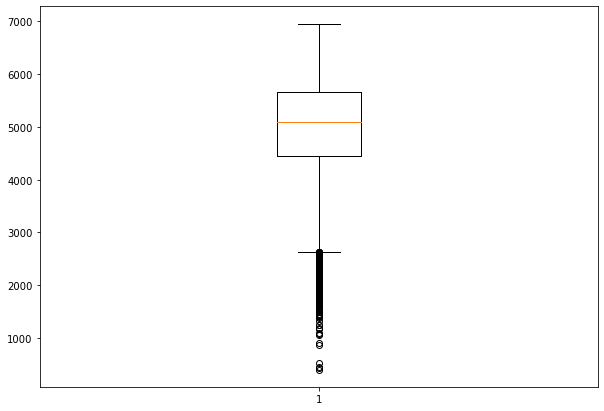

In [25]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['RewardPoints'])
 
# show plot
plt.show()

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

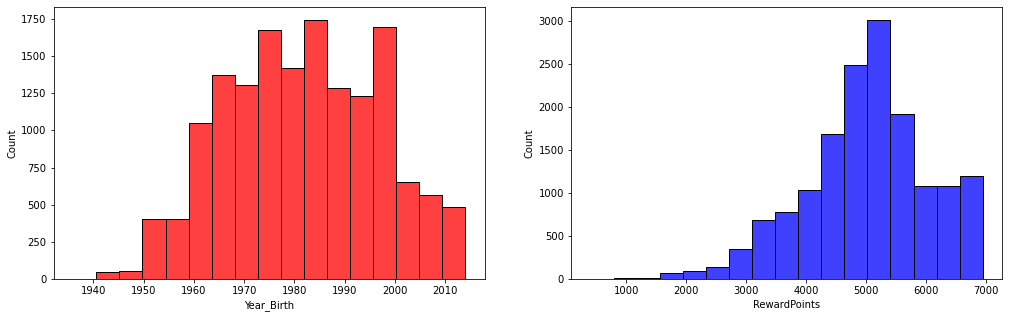

In [26]:
fig, axes = plt.subplots(1,2, figsize = (17,5))
sns.histplot(ax = axes[0], data = df, x = 'Year_Birth', color="r", bins = 17)
#sns.histplot(ax = axes[1], data = df, x = 'Recommendation', color="w", bins = 17)
sns.histplot(ax = axes[1], data = df, x = 'RewardPoints', color="b", bins = 17)

[BACK TO ÍNDICE](#indi)

<a id='preprocess'></a>
## 4. Preprocess

<a id='cleaning'></a>
### 4.1. Data Cleaning

<a id='misclass'></a>
#### 4.1.1. Misclassification

In [27]:
df['Longevity'] = df['Longevity'].replace('y', 'yes')
df['Longevity'].value_counts()

yes    12712
no      2874
Name: Longevity, dtype: int64

The 167 'y' were transformed to 'yes'

In [28]:
df['Wifi'] = df['Wifi'].replace(6,df['Wifi'].value_counts().idxmax())
df['Wifi'].value_counts()

4    3739
5    3445
3    3347
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

We decided to replace the 'Wifi' observations that have a value of 6 with the mode of all observations, since we are not sure if people wanted to give a rating of 5 or if they though if the rating scale was from 0 to 10.

<a id='incoh'> </a>
#### 4.1.2. Incoherencies

In [29]:
df.drop(df[df['RewardPoints'] < 1000].index, inplace = True)
df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


In [30]:
df[df['RewardPoints'] < 1000].index

Int64Index([], dtype='int64', name='BookingID')

By filtering 'RewardPoints' by datapoints lower than 1000 we found 6 entries that we consider as outliers (0,025% of total dataset)

[BACK TO ÍNDICE](#indi)

<a id='transform'></a>
### 4.2. Data Transformation

<a id='newvar'></a>
#### 4.2.1 New Variables

##### Age

In [31]:
from datetime import date
df['Age'] = date.today().year - df['Year_Birth'] # define a new variable called Age
df.drop('Year_Birth', axis = 1, inplace = True)
df

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,3,4,3,3,3,3,4,3,4,48.0
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,3,4,5,5,5,5,1,5,2,57.0
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,4,4,3,3,2,3,2,3,1,49.0
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,4,5,4,4,4,4,4,4,3,29.0
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,5,5,5,5,3,4,1,3,5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,2,4,3,4,5,1,3,4,3,34.0
15585,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,3,5,5,3,1,3,4,4,5,22.0
15586,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,4,5,4,4,4,4,5,4,4,58.0


Create a new variable called 'Age' that consists of subtracting 2022 to the year of birth of each client. 
After computing this new variable we remove the 'Year_Birth' variable from the dataset.

##### Gender

In [32]:
df['prefix'] = df['Name'].str[0:2]
df['Gender'] = np.where(df['prefix']!= 'Mr', '1', '0')
df.drop('prefix', axis = 1, inplace = True)
df

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Gender
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,4,3,3,3,3,4,3,4,48.0,1
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,4,5,5,5,5,1,5,2,57.0,0
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,4,3,3,2,3,2,3,1,49.0,0
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,5,4,4,4,4,4,4,3,29.0,1
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,5,5,5,3,4,1,3,5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,4,3,4,5,1,3,4,3,34.0,1
15585,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,5,5,3,1,3,4,4,5,22.0,1
15586,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,5,4,4,4,4,5,4,4,58.0,0


Generate the Gender variable using the prefix of the 'Name'.
Encode the Gender variable into a dummy variable. If the client is female 'Gender' = 1, if it is male 'Gender' = 0

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

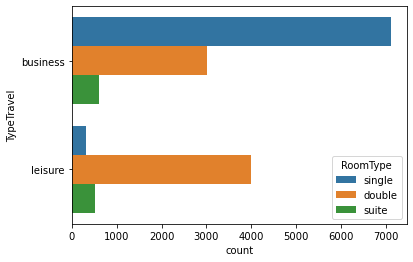

In [33]:
sns.countplot(y = 'TypeTravel', hue = 'RoomType', data = df)

Business type travels most likely will choose a single room, while leisure type travel will choose double rooms

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

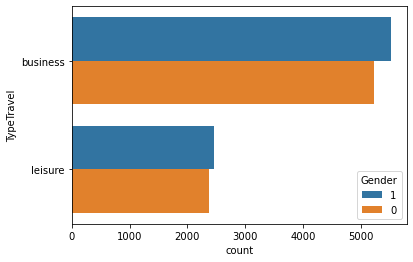

In [34]:
sns.countplot(y = 'TypeTravel', hue = 'Gender', data = df)

<AxesSubplot:xlabel='count', ylabel='RoomType'>

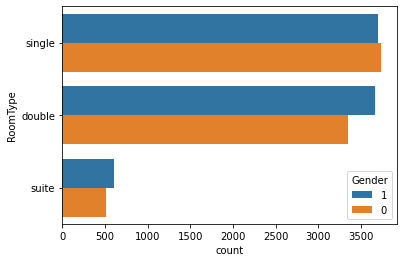

In [35]:
sns.countplot(y = 'RoomType', hue = 'Gender', data = df)

##### Longevity

In [36]:
df['d_Longevity'] = np.where(df['Longevity'] != 'no', '1', '0')

Create a dummy variable for 'Longevity'. If 'Longevity' = 'yes' use dummy 1, if 'Longevity' = 'no' use dummy 0.

##### Churn

In [37]:
df['d_Churn'] = np.where(df['Churn'] != 'nochurn', '1', '0')

Create a dummy variable for 'Churn'. If 'Churn' = 'churn' use dummy 1, if 'Churn' = 'nochurn' use dummy 0.

##### Type Travel

In [38]:
df['d_TypeTravel'] = np.where(df['TypeTravel'] != 'leisure', '1', '0')

Create a dummy variable for 'TypeTravel'. If 'TypeTravel' = 'business' use dummy 1, if 'TypeTravel' = 'leisure' use dummy 0.

##### Room Type

In [39]:
df['d_Single'] = np.where(df['RoomType'] == 'single', '1', '0')
df['d_Double'] = np.where(df['RoomType'] == 'double', '1', '0')

Create two dummy variables for 'RoomType'. If 'd_Single' = 0 and 'd_Double' = 0 it means that the room is a suite. 

In [40]:
df['Recommendation'] = df[['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']].mean(axis = 1)
df

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Cleanliness,BarService,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,Recommendation
BookingID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,3,4,48.0,1,1,1,1,1,0,3.285714
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,5,2,57.0,0,1,0,1,1,0,3.142857
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,3,1,49.0,0,1,1,1,1,0,2.714286
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,4,3,29.0,1,1,0,0,0,1,3.142857
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,3,5,33.0,0,1,0,1,1,0,3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,4,3,34.0,1,0,1,1,0,1,2.714286
15585,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,4,5,22.0,1,0,1,1,0,1,3.571429
15586,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,4,4,58.0,0,1,0,1,1,0,3.214286


Create a new variable 'Recomendation' that is equal to the mean of all the surveys variables for each Booking ID.

In [41]:
df = df[['Name', 'Age', 'Gender', 'd_Longevity','d_Churn', 'd_TypeTravel', 'd_Single', 'd_Double', 'RewardPoints', 'Recommendation',
               'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
               'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']]
df.head()

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,Ms. Nicole Clarke,48.0,1,1,1,1,1,0,4907,3.285714,...,4,3,4,3,3,3,3,4,3,4
1,Mr. Jesse Scott,57.0,0,1,0,1,1,0,6724,3.142857,...,5,3,4,5,5,5,5,1,5,2
2,Mr. Christopher Carter,49.0,0,1,1,1,1,0,4365,2.714286,...,1,4,4,3,3,2,3,2,3,1
3,Ms. Jennifer Morgan,29.0,1,1,0,0,0,1,3849,3.142857,...,4,4,5,4,4,4,4,4,4,3
4,Mr. Michael White,33.0,0,1,0,1,1,0,5376,3.571429,...,5,5,5,5,5,3,4,1,3,5


[BACK TO ÍNDICE](#indi)

<a id='missing'></a>
#### 4.2.2 Missing Values

In [42]:
df.isna().sum()

Name                   0
Age                  195
Gender                 0
d_Longevity            0
d_Churn                0
d_TypeTravel           0
d_Single               0
d_Double               0
RewardPoints           0
Recommendation         0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

Existem 195 observações com valores nulos para a idade. Existem ainda 1359 observações para as quais o nome do cliente é duplicado. Porém, apenas dois nomes constam em ambas as listas, i.e. Nomes que numa observação têm missing value para a idade e mas na observação duplicada têm data de nascimento.
Não tendo a certeza se é a mesma pessoa ou somente clientes com nomes iguais, não iremos substituir os 2 NaN por estes valores. Faremos a substituição de todos os valores NaN para a idade recorrendo ao KNN Imputer.

In [43]:
df[df['Age'].isna() & df['Name'].duplicated()]

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
3125,Ms. Elizabeth Davis,NaN,1,1,0,1,1,0,3022,4.428571,...,5,5,5,5,5,5,5,5,5,5
3894,Ms. Elizabeth Rodriguez,NaN,1,1,1,1,1,0,4693,3.071429,...,4,3,3,2,1,3,2,3,1,3
4298,Ms. Elizabeth Boyer,NaN,1,0,1,1,0,1,4681,2.857143,...,2,4,2,2,5,3,2,1,4,2
5094,Ms. Elizabeth Martinez,NaN,1,1,0,1,1,0,3323,3.785714,...,2,4,4,4,4,4,4,4,4,3
5445,Ms. Elizabeth Brown,NaN,1,1,0,0,0,1,6103,3.428571,...,4,4,4,4,4,2,4,5,5,4
5719,Ms. Elizabeth Smith,NaN,1,1,0,1,0,1,4621,3.714286,...,5,5,5,5,1,4,5,1,5,5
6060,Ms. Elizabeth Rodriguez,NaN,1,1,0,0,0,1,6003,4.071429,...,2,5,4,4,4,4,4,5,4,5
6774,Mr. Edward Williams,NaN,0,1,1,0,0,1,5235,2.857143,...,2,3,5,2,1,4,4,4,1,2
8542,Ms. Elizabeth Brown,NaN,1,1,0,1,0,1,6762,3.000000,...,5,4,2,3,3,3,3,5,3,2


In [44]:
null = df[df['Age'].isna()]  # bookings que têm Missing Values para ano
dup = df[df.Name.duplicated() & df['Age']]             #bookings que têm nomes duplicados
listanomes = list(set(null.Name) & set(dup.Name)) #criar uma lista dos nomes presentes em ambas as tabelas
dup[dup['Name'].isin(listanomes)].head()

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
4187,Mr. Edward Anderson,22.0,0,1,1,0,0,1,4853,2.428571,...,2,2,3,2,3,1,3,2,4,2
10123,Ms. Emily Thomas,33.0,1,1,1,1,0,1,4138,3.500000,...,3,3,3,3,3,5,4,4,3,3


In [45]:
df[df['Name'] == 'Mr. Edward Anderson']

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
1976,Mr. Edward Anderson,69.0,0,1,1,0,0,1,4906,3.071429,...,3,4,3,3,2,1,3,2,4,3
4187,Mr. Edward Anderson,22.0,0,1,1,0,0,1,4853,2.428571,...,2,2,3,2,3,1,3,2,4,2
12075,Mr. Edward Anderson,NaN,0,1,1,0,0,1,4845,2.000000,...,1,1,1,1,4,2,4,2,4,1


In [46]:
df[df['Name'] == 'Ms. Emily Thomas']

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
27,Ms. Emily Thomas,NaN,1,1,0,0,0,1,4760,3.357143,...,5,0,3,5,4,4,5,4,4,5
10123,Ms. Emily Thomas,33.0,1,1,1,1,0,1,4138,3.500000,...,3,3,3,3,3,5,4,4,3,3


In [47]:
df.loc[(df.Name == 'Ms. Emily Thomas'),'Age'] = 33

/Users/jorgecompleto/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
df[df['Name'] == 'Ms. Emily Thomas']

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
27,Ms. Emily Thomas,33.0,1,1,0,0,0,1,4760,3.357143,...,5,0,3,5,4,4,5,4,4,5
10123,Ms. Emily Thomas,33.0,1,1,1,1,0,1,4138,3.500000,...,3,3,3,3,3,5,4,4,3,3


<AxesSubplot:xlabel='Age', ylabel='Count'>

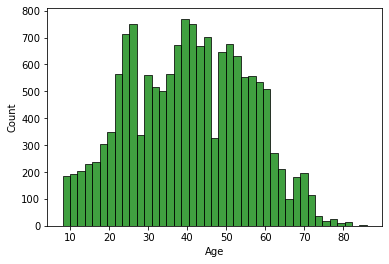

In [49]:
sns.histplot(df['Age'], color = 'g')

There are several bookings made by sub 15 year olds. This is odd. We will drop the 'Age' values for these BookingID and use KNNImputer to refill them again.

###### Subject to change

In [50]:
df.loc[df['Age'] < 15, ['Age']] = np.nan

/Users/jorgecompleto/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
df.isna().sum()

Name                   0
Age                  884
Gender                 0
d_Longevity            0
d_Churn                0
d_TypeTravel           0
d_Single               0
d_Double               0
RewardPoints           0
Recommendation         0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

In [52]:
from sklearn.impute import KNNImputer

df_knn = df.drop(columns=["Name"])

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_matrix = imputer.fit_transform(df_knn)

df_v2 = pd.DataFrame(data=imputed_matrix, columns=df_knn.columns, index=df_knn.index)

In [53]:
df.loc[df['Age'].isna()]

,Name,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
119,Ms. Jennifer Smith,NaN,1,0,1,1,0,1,4504,1.785714,...,1,2,1,1,1,1,4,1,3,1
122,Mr. Justin Keith,NaN,0,1,0,0,0,1,4642,3.285714,...,1,4,1,1,4,5,5,5,4,1
126,Ms. Elizabeth Tyler,NaN,1,1,1,1,0,1,5151,2.428571,...,2,2,2,2,3,4,3,2,4,2
131,Ms. Summer Garcia,NaN,1,0,1,1,0,1,5133,1.785714,...,1,2,1,1,1,3,3,3,2,1
141,Ms. Michelle Butler,NaN,1,1,0,0,1,0,5353,4.142857,...,4,4,4,5,5,4,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15445,Ms. Elizabeth Wilson,NaN,1,1,0,1,1,0,5438,4.500000,...,5,5,5,5,4,4,5,4,4,5
15446,Mr. Samuel Wilson,NaN,0,1,1,0,0,1,4059,3.285714,...,3,5,5,1,2,2,5,5,1,5
15496,Mr. Brandon Rosales,NaN,0,1,1,0,0,1,4733,3.000000,...,4,2,2,5,4,1,1,2,3,2


In [54]:
df_v2.loc[df_v2['Age'].isna()]

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,


We no longer have NaN values in our dataset.

In [55]:
df_v2['Age'] = df_v2['Age'].apply(np.floor)
df_v2.head()

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,4907.0,3.285714,3.0,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0
1,57.0,0.0,1.0,0.0,1.0,1.0,0.0,6724.0,3.142857,1.0,...,5.0,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0
2,49.0,0.0,1.0,1.0,1.0,1.0,0.0,4365.0,2.714286,3.0,...,1.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0
3,29.0,1.0,1.0,0.0,0.0,0.0,1.0,3849.0,3.142857,1.0,...,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
4,33.0,0.0,1.0,0.0,1.0,1.0,0.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0


Rounding the 'Age' variable because some values that were imputed with KNN Imputer had decimal values.

<AxesSubplot:xlabel='Age', ylabel='Count'>

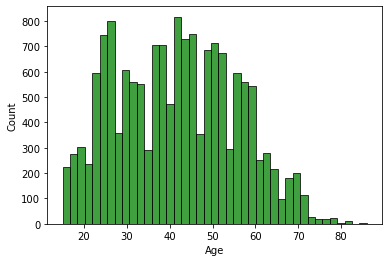

In [56]:
sns.histplot(df_v2['Age'], color = 'g')

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

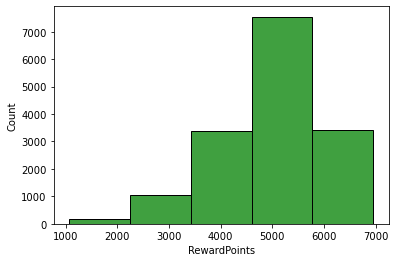

In [57]:
sns.histplot(df_v2['RewardPoints'], color = 'g', bins = 5)

[BACK TO ÍNDICE](#indi)
<a id='bins'></a>
#### 4.2.3. Binning

We will transform the Reward Points and Age into five bins. This will not only allow us to simplify our analysis and marketing conclusions stemming from these variables but also improve our graphical visualizaiton. 

In [58]:
df_v2['RewardPoints_bins'] = pd.cut(df['RewardPoints'], 5, labels = ["very low", "low", "medium", "high", "very high"])
df_v2

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,4907.0,3.285714,3.0,...,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,high
1,57.0,0.0,1.0,0.0,1.0,1.0,0.0,6724.0,3.142857,1.0,...,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,very high
2,49.0,0.0,1.0,1.0,1.0,1.0,0.0,4365.0,2.714286,3.0,...,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,medium
3,29.0,1.0,1.0,0.0,0.0,0.0,1.0,3849.0,3.142857,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,medium
4,33.0,0.0,1.0,0.0,1.0,1.0,0.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,34.0,1.0,0.0,1.0,1.0,0.0,1.0,4968.0,2.714286,2.0,...,2.0,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,high
15585,22.0,1.0,0.0,1.0,1.0,0.0,1.0,4970.0,3.571429,3.0,...,3.0,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,high
15586,58.0,0.0,1.0,0.0,1.0,1.0,0.0,4046.0,3.214286,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,medium


In [59]:
df_v2['RewardPoints_bins'] = df_v2['RewardPoints_bins'].replace('very low',0).replace('low',1).replace('medium',2).replace('high', 3).replace('very high', 4)
df_v2.head()

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,4907.0,3.285714,3.0,...,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3
1,57.0,0.0,1.0,0.0,1.0,1.0,0.0,6724.0,3.142857,1.0,...,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4
2,49.0,0.0,1.0,1.0,1.0,1.0,0.0,4365.0,2.714286,3.0,...,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2
3,29.0,1.0,1.0,0.0,0.0,0.0,1.0,3849.0,3.142857,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2
4,33.0,0.0,1.0,0.0,1.0,1.0,0.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3


In [60]:
df_v2['RewardPoints_bins'] = df_v2['RewardPoints_bins'].astype('int')
df_v2['RewardPoints_bins'].dtype

dtype('int64')

In [61]:
df_v2['Age_bin'] = pd.qcut(df_v2['Age'], q = 5)
bin_labels_5 = {1.0, 2.0, 3.0, 4.0, 5.0}
df_v2['Age_bin'] = pd.qcut(df_v2['Age'], 
                            q = [0, .2, .4, .6, .8, 1],
                              labels = bin_labels_5)

In [62]:
df_v2['Age_bin'] = df_v2['Age_bin'].astype('int')
df_v2['Age_bin'].dtype

dtype('int64')

[BACK TO ÍNDICE](#indi)
<a id='scale'></a>
#### 4.2.4. Scalling

In [63]:
scaled_df = MinMaxScaler().fit_transform(df_v2)
scaled_df

array([[0.46478873, 1.        , 1.        , ..., 0.8       , 0.75      ,
        0.75      ],
       [0.5915493 , 0.        , 1.        , ..., 0.4       , 1.        ,
        1.        ],
       [0.47887324, 0.        , 1.        , ..., 0.2       , 0.5       ,
        0.75      ],
       ...,
       [0.6056338 , 0.        , 1.        , ..., 0.8       , 0.5       ,
        1.        ],
       [0.21126761, 0.        , 1.        , ..., 1.        , 0.75      ,
        0.25      ],
       [0.33802817, 0.        , 1.        , ..., 0.6       , 0.75      ,
        0.5       ]])

In [64]:
cols = df_v2.columns
#index = df_v2.index
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin
0,0.464789,1.0,1.0,1.0,1.0,1.0,0.0,0.652787,0.555556,0.6,...,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,0.75,0.75
1,0.591549,0.0,1.0,0.0,1.0,1.0,0.0,0.961591,0.518519,0.2,...,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,1.00,1.00
2,0.478873,0.0,1.0,1.0,1.0,1.0,0.0,0.560673,0.407407,0.6,...,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,0.50,0.75
3,0.197183,1.0,1.0,0.0,0.0,0.0,1.0,0.472978,0.518519,0.2,...,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0.50,0.25
4,0.253521,0.0,1.0,0.0,1.0,1.0,0.0,0.732495,0.629630,0.4,...,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,0.267606,1.0,0.0,1.0,1.0,0.0,1.0,0.663154,0.407407,0.4,...,0.75,0.6,0.75,1.0,0.00,0.50,0.75,0.6,0.75,0.25
15576,0.098592,1.0,0.0,1.0,1.0,0.0,1.0,0.663494,0.629630,0.6,...,1.00,1.0,0.50,0.2,0.50,0.75,0.75,1.0,0.75,0.00
15577,0.605634,0.0,1.0,0.0,1.0,1.0,0.0,0.506458,0.537037,0.2,...,1.00,0.8,0.75,0.8,0.75,1.00,0.75,0.8,0.50,1.00
15578,0.211268,0.0,1.0,0.0,0.0,0.0,1.0,0.694935,0.759259,0.8,...,1.00,1.0,0.25,1.0,0.75,0.50,0.75,1.0,0.75,0.25


Data is currently scalled and ready for kmeans to be applied.

[BACK TO ÍNDICE](#indi)
<a id='reduction'></a>
#### 4.2.5. Data Reduction

<AxesSubplot:>

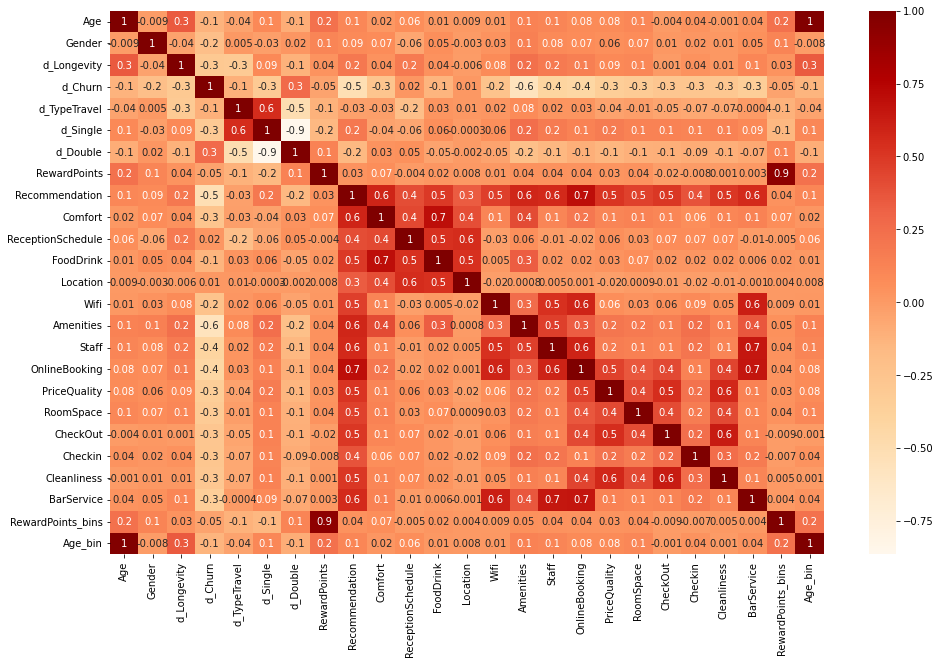

In [65]:
scaled_corr = scaled_df.corr(method = 'spearman')
figure_2 = plt.figure(figsize = (16, 10))
sns.heatmap(scaled_corr, cmap = 'OrRd',annot = True, fmt = '.1g')

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

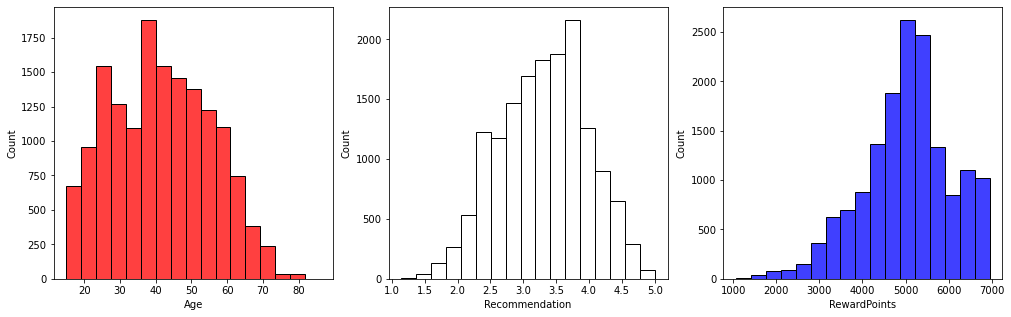

In [66]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.histplot(ax = axes[0], data = df_v2, x = 'Age', color = "r", bins = 17)
sns.histplot(ax = axes[1], data = df_v2, x = 'Recommendation', color = "w", bins = 17)
sns.histplot(ax = axes[2], data = df_v2, x = 'RewardPoints', color = "b", bins = 17)

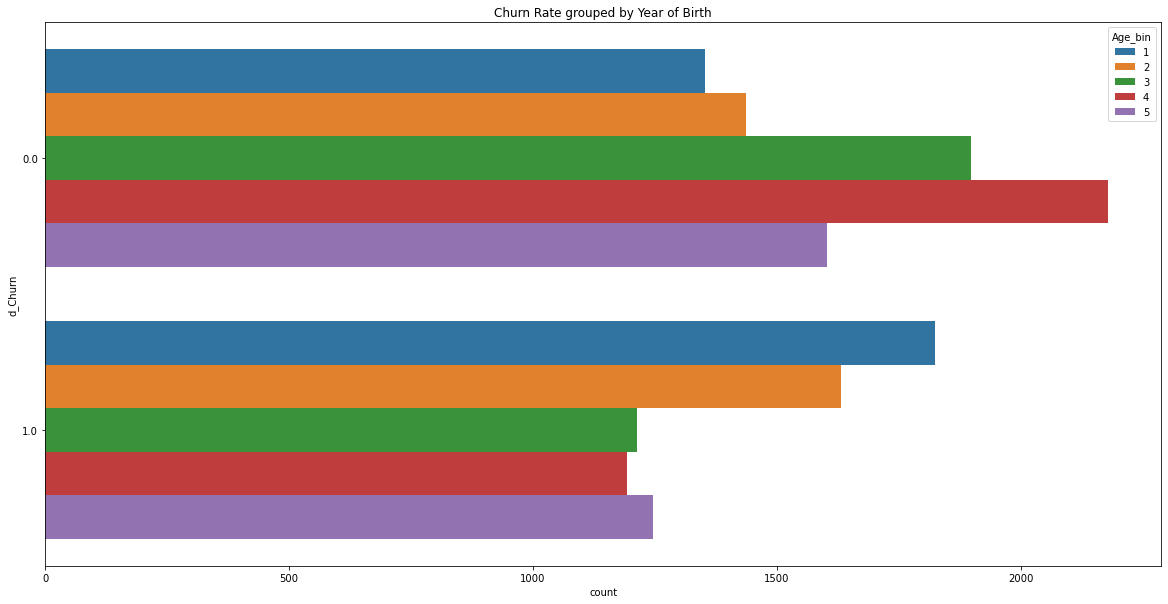

In [67]:
plt.figure(figsize=(20,10))
sns.countplot(y = 'd_Churn', hue = 'Age_bin', data = df_v2)
plt.title('Churn Rate grouped by Year of Birth')
plt.show()
plt.close()

Desenvolver legenda.

[BACK TO ÍNDICE](#indi)

<a id='cluster'></a>
### 5. Clustering

[BACK TO ÍNDICE](#indi)
<a id='perspectives'></a>
#### 5.1 Perspectives

Here we will be using two different approaches to cluster booking records: <br>

- __Customer ID:__ Focusing on customer's profiles;
    
    - _Possible variables to use:_ Age, Gender, Reward Points, Recomendations, Type of Room and Churn.

- __Survey Results:__ Focusing on customer's preferences;

We will be using __Reward Points__, __Recommendation__ and __Age__.

In [68]:
df_client = scaled_df[['RewardPoints','Recommendation', 'Age']].copy()
df_client

,RewardPoints,Recommendation,Age
0,0.652787,0.555556,0.464789
1,0.961591,0.518519,0.591549
2,0.560673,0.407407,0.478873
3,0.472978,0.518519,0.197183
4,0.732495,0.629630,0.253521
...,...,...,...
15575,0.663154,0.407407,0.267606
15576,0.663494,0.629630,0.098592
15577,0.506458,0.537037,0.605634
15578,0.694935,0.759259,0.211268


In [69]:
ks = range(1, 11) # loop between 1 and 10
inertias = [] # also called sum of squared errors (difference between the points of the data and the centroid)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df_client)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

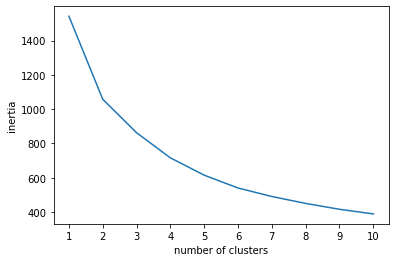

In [70]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

[BACK TO ÍNDICE](#indi)
<a id='customer'></a>
#### 5.1.1. Clustering - Clients Perspective  

In [71]:
model_k3 = KMeans(n_clusters = 3, random_state = 0)

In [72]:
df_client_k3 = df_client.copy() # copy the prod dataset in order to join the label column to the original one
model_k3.fit(df_client_k3)

KMeans(n_clusters=3, random_state=0)

In [73]:
df_client_k3['label'] = model_k3.labels_
df_client_k3

,RewardPoints,Recommendation,Age,label
0,0.652787,0.555556,0.464789,1
1,0.961591,0.518519,0.591549,1
2,0.560673,0.407407,0.478873,2
3,0.472978,0.518519,0.197183,2
4,0.732495,0.629630,0.253521,0
...,...,...,...,...
15575,0.663154,0.407407,0.267606,2
15576,0.663494,0.629630,0.098592,2
15577,0.506458,0.537037,0.605634,1
15578,0.694935,0.759259,0.211268,0


In [74]:
df_client_k3.groupby(['label']).mean().transpose()

label,0,1,2
RewardPoints,0.543688,0.797473,0.646308
Recommendation,0.698162,0.573372,0.425855
Age,0.327190,0.553623,0.216171


Testar um kmean RoomType e TypeTravel contra os surveys/recomendação média

In [75]:
labels_client_k3 = model_k3.labels_

In [76]:
centroids_client_k3 = model_k3.cluster_centers_
centroids_client_k3

array([[0.54389961, 0.69835916, 0.3280488 ],
       [0.79764613, 0.57259745, 0.55362517],
       [0.64626264, 0.42629347, 0.21564079]])

In [77]:
centroids_client_k3_x = centroids_client_k3[:,1] # Recommendation
centroids_client_k3_y = centroids_client_k3[:,2] # Age

In [78]:
centroid_0_Recommendation = centroids_client_k3[0,1] # o primeiro número é o cluster, e o segundo número é a variável
centroid_1_Recommendation = centroids_client_k3[1,1]
centroid_2_Recommendation = centroids_client_k3[2,1]
centroid_0_Age = centroids_client_k3[0,2]
centroid_1_Age = centroids_client_k3[1,2]
centroid_2_Age = centroids_client_k3[2,2]

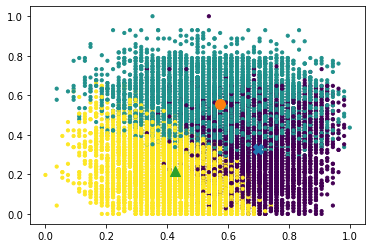

In [79]:
plt.scatter(df_client_k3.Recommendation, df_client_k3.Age, c = df_client_k3.label, s = 10)
plt.scatter(centroid_0_Recommendation, centroid_0_Age, marker = 'X', s = 100)
plt.scatter(centroid_1_Recommendation, centroid_1_Age, marker = 'o', s = 100)
plt.scatter(centroid_2_Recommendation, centroid_2_Age, marker = '^', s = 100)
plt.show()

<a id='survey'></a>
#### 5.1.2 Clustering - Survey Perspective  

In [80]:
Survey = scaled_df[['Comfort', 'Location', 'Wifi', 'Staff', 'OnlineBooking', 'PriceQuality']].copy()
Survey

,Comfort,Location,Wifi,Staff,OnlineBooking,PriceQuality
0,0.6,0.75,0.8,0.75,0.6,0.50
1,0.2,0.00,1.0,0.75,1.0,1.00
2,0.6,0.50,0.2,0.75,0.6,0.50
3,0.2,0.00,0.8,1.00,0.8,0.75
4,0.4,0.25,1.0,1.00,1.0,1.00
...,...,...,...,...,...,...
15575,0.4,0.25,0.6,0.75,0.6,0.75
15576,0.6,0.50,1.0,1.00,1.0,0.50
15577,0.2,0.00,0.6,1.00,0.8,0.75
15578,0.8,0.75,1.0,1.00,1.0,0.25


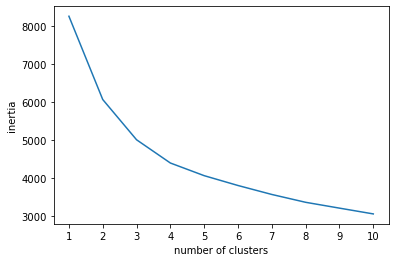

In [81]:
ks_value2 = range(1, 11)
inertias_value2 = []

for k in ks_value2:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(Survey)

    # Append the inertia to the list of inertias
    inertias_value2.append(model.inertia_)

    
    
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks_value2, inertias_value2)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks_value2)
# call plt.show()
plt.show()

In [82]:
Survey_k3 = Survey.copy()
Survey_model_k3 = KMeans(n_clusters = 3, random_state = 100).fit(Survey_k3)

In [83]:
Survey_k3['label_2'] = Survey_model_k3.labels_

In [84]:
Survey_k3['label_2'].value_counts()

1    5930
0    5249
2    4401
Name: label_2, dtype: int64

In [85]:
Survey_k3.groupby(['label_2']).mean().transpose()

label_2,0,1,2
Comfort,0.485921,0.768971,0.396455
Location,0.507811,0.727867,0.171382
Wifi,0.430825,0.757943,0.759373
Staff,0.295628,0.796206,0.792831
OnlineBooking,0.418937,0.837167,0.818041
PriceQuality,0.443132,0.706324,0.696773


In [86]:
labels_survey_k3 = Survey_model_k3.labels_

In [87]:
centroids_survey_k3 = Survey_model_k3.cluster_centers_
centroids_survey_k3

array([[0.48592113, 0.50781101, 0.43082492, 0.29562774, 0.41893694,
        0.44313203],
       [0.76897133, 0.72786678, 0.75794266, 0.79620573, 0.83716695,
        0.70632378],
       [0.39645535, 0.1713815 , 0.75937287, 0.79283117, 0.81804135,
        0.69677346]])

In [88]:
centroids_survey_k3_x = centroids_survey_k3[:,0]
centroids_survey_k3_y = centroids_survey_k3[:,1]

In [89]:
xs = Survey_k3.iloc[:,0]
ys = Survey_k3.iloc[:,1]

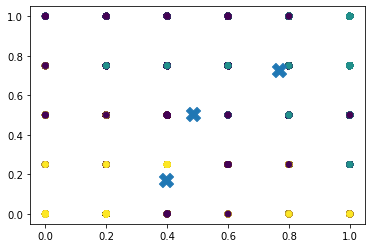

In [90]:
plt.scatter(xs, ys, c = labels_survey_k3)
plt.scatter(centroids_survey_k3_x, centroids_survey_k3_y, marker = 'X', s = 200)
plt.show()

In [91]:
Survey_k3_0 = Survey_k3[Survey_k3.label_2 == 0]
Survey_k3_1 = Survey_k3[Survey_k3.label_2 == 1]
Survey_k3_2 = Survey_k3[Survey_k3.label_2 == 2]
del Survey_k3_0['label_2']
del Survey_k3_1['label_2']
del Survey_k3_2['label_2']

In [92]:
Survey_k3['label_2']

0        1
1        2
2        0
3        2
4        2
        ..
15575    2
15576    1
15577    2
15578    1
15579    0
Name: label_2, Length: 15580, dtype: int32

[Text(0.5, 1.0, 'Survey Kmeans Clustering Using k = 0')]

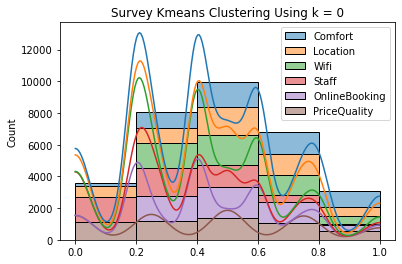

In [93]:
# Survey Kmeans Clustering Using k= 0 "layer", "dodge", "stack", "fill"
sns.histplot(data = Survey_k3_0, multiple = "stack", kde = True, bins = 5).set(title = 'Survey Kmeans Clustering Using k = 0')

[Text(0.5, 1.0, 'Survey Kmeans Clustering Using k = 1')]

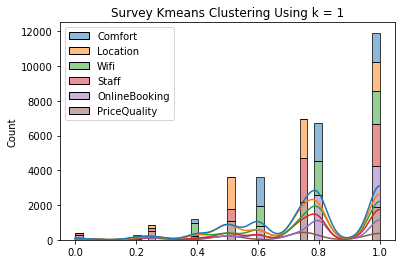

In [94]:
# Survey Kmeans Clustering Using k= 1
sns.histplot(data = Survey_k3_1, multiple = "stack", kde = True).set(title = 'Survey Kmeans Clustering Using k = 1')

[Text(0.5, 1.0, 'Survey Kmeans Clustering Using k = 2')]

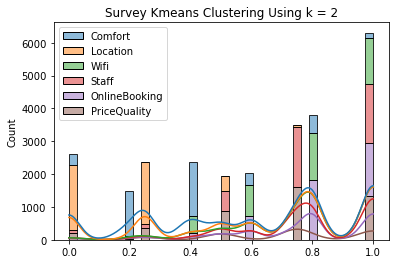

In [95]:
# Survey Kmeans Clustering Using k= 2
sns.histplot(data = Survey_k3_2, multiple = "stack", kde = True).set(title = 'Survey Kmeans Clustering Using k = 2')

No conclusions were taken out of these graphs as they show scaled data. Another set of graphs were made in chapter 5.2.2 regarding the non scaled data.

<a id='join_perspectives'></a>
#### 5.1.3 Clustering - Join both perspectives 

In [96]:
df_merged = pd.concat([Survey_k3, df_client_k3], axis = 1)
df_merged

,Comfort,Location,Wifi,Staff,OnlineBooking,PriceQuality,label_2,RewardPoints,Recommendation,Age,label
0,0.6,0.75,0.8,0.75,0.6,0.50,1,0.652787,0.555556,0.464789,1
1,0.2,0.00,1.0,0.75,1.0,1.00,2,0.961591,0.518519,0.591549,1
2,0.6,0.50,0.2,0.75,0.6,0.50,0,0.560673,0.407407,0.478873,2
3,0.2,0.00,0.8,1.00,0.8,0.75,2,0.472978,0.518519,0.197183,2
4,0.4,0.25,1.0,1.00,1.0,1.00,2,0.732495,0.629630,0.253521,0
...,...,...,...,...,...,...,...,...,...,...,...
15575,0.4,0.25,0.6,0.75,0.6,0.75,2,0.663154,0.407407,0.267606,2
15576,0.6,0.50,1.0,1.00,1.0,0.50,1,0.663494,0.629630,0.098592,2
15577,0.2,0.00,0.6,1.00,0.8,0.75,2,0.506458,0.537037,0.605634,1
15578,0.8,0.75,1.0,1.00,1.0,0.25,1,0.694935,0.759259,0.211268,0


In [97]:
df_merged['cluster'] = df_merged['label'].astype(str) + df_merged['label_2'].astype(str)
df_merged

,Comfort,Location,Wifi,Staff,OnlineBooking,PriceQuality,label_2,RewardPoints,Recommendation,Age,label,cluster
0,0.6,0.75,0.8,0.75,0.6,0.50,1,0.652787,0.555556,0.464789,1,11
1,0.2,0.00,1.0,0.75,1.0,1.00,2,0.961591,0.518519,0.591549,1,12
2,0.6,0.50,0.2,0.75,0.6,0.50,0,0.560673,0.407407,0.478873,2,20
3,0.2,0.00,0.8,1.00,0.8,0.75,2,0.472978,0.518519,0.197183,2,22
4,0.4,0.25,1.0,1.00,1.0,1.00,2,0.732495,0.629630,0.253521,0,02
...,...,...,...,...,...,...,...,...,...,...,...,...
15575,0.4,0.25,0.6,0.75,0.6,0.75,2,0.663154,0.407407,0.267606,2,22
15576,0.6,0.50,1.0,1.00,1.0,0.50,1,0.663494,0.629630,0.098592,2,21
15577,0.2,0.00,0.6,1.00,0.8,0.75,2,0.506458,0.537037,0.605634,1,12
15578,0.8,0.75,1.0,1.00,1.0,0.25,1,0.694935,0.759259,0.211268,0,01


In [98]:
df_merged['cluster'].value_counts()

20    3250
01    2960
11    2321
12    1830
10    1649
22    1343
02    1228
21     649
00     350
Name: cluster, dtype: int64

In [99]:
df_final = df_v2.copy()
df_final

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,4907.0,3.285714,3.0,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3,4
1,57.0,0.0,1.0,0.0,1.0,1.0,0.0,6724.0,3.142857,1.0,...,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4,5
2,49.0,0.0,1.0,1.0,1.0,1.0,0.0,4365.0,2.714286,3.0,...,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2,4
3,29.0,1.0,1.0,0.0,0.0,0.0,1.0,3849.0,3.142857,1.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2,2
4,33.0,0.0,1.0,0.0,1.0,1.0,0.0,5376.0,3.571429,2.0,...,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,34.0,1.0,0.0,1.0,1.0,0.0,1.0,4968.0,2.714286,2.0,...,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,3,2
15585,22.0,1.0,0.0,1.0,1.0,0.0,1.0,4970.0,3.571429,3.0,...,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,3,1
15586,58.0,0.0,1.0,0.0,1.0,1.0,0.0,4046.0,3.214286,1.0,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2,5


In [100]:
df_final.reset_index(inplace = True)
df_final

,BookingID,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin
0,0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,4907.0,3.285714,...,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3,4
1,1,57.0,0.0,1.0,0.0,1.0,1.0,0.0,6724.0,3.142857,...,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0,4,5
2,2,49.0,0.0,1.0,1.0,1.0,1.0,0.0,4365.0,2.714286,...,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2,4
3,3,29.0,1.0,1.0,0.0,0.0,0.0,1.0,3849.0,3.142857,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2,2
4,4,33.0,0.0,1.0,0.0,1.0,1.0,0.0,5376.0,3.571429,...,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,15584,34.0,1.0,0.0,1.0,1.0,0.0,1.0,4968.0,2.714286,...,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0,3,2
15576,15585,22.0,1.0,0.0,1.0,1.0,0.0,1.0,4970.0,3.571429,...,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0,3,1
15577,15586,58.0,0.0,1.0,0.0,1.0,1.0,0.0,4046.0,3.214286,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2,5
15578,15587,30.0,0.0,1.0,0.0,0.0,0.0,1.0,5155.0,4.071429,...,5.0,5.0,2.0,5.0,4.0,3.0,4.0,5.0,3,2


In [101]:
df_final = pd.concat([df_final, df_merged['cluster']], axis = 1)
df_final = pd.concat([df_final, df_merged['label']], axis = 1)
df_final = pd.concat([df_final, df_merged['label_2']], axis = 1)
df_final

,BookingID,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin,cluster,label,label_2
0,0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,4907.0,3.285714,...,3.0,3.0,4.0,3.0,4.0,3,4,11,1,1
1,1,57.0,0.0,1.0,0.0,1.0,1.0,0.0,6724.0,3.142857,...,5.0,5.0,1.0,5.0,2.0,4,5,12,1,2
2,2,49.0,0.0,1.0,1.0,1.0,1.0,0.0,4365.0,2.714286,...,2.0,3.0,2.0,3.0,1.0,2,4,20,2,0
3,3,29.0,1.0,1.0,0.0,0.0,0.0,1.0,3849.0,3.142857,...,4.0,4.0,4.0,4.0,3.0,2,2,22,2,2
4,4,33.0,0.0,1.0,0.0,1.0,1.0,0.0,5376.0,3.571429,...,3.0,4.0,1.0,3.0,5.0,3,2,02,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,15584,34.0,1.0,0.0,1.0,1.0,0.0,1.0,4968.0,2.714286,...,5.0,1.0,3.0,4.0,3.0,3,2,22,2,2
15576,15585,22.0,1.0,0.0,1.0,1.0,0.0,1.0,4970.0,3.571429,...,1.0,3.0,4.0,4.0,5.0,3,1,21,2,1
15577,15586,58.0,0.0,1.0,0.0,1.0,1.0,0.0,4046.0,3.214286,...,4.0,4.0,5.0,4.0,4.0,2,5,12,1,2
15578,15587,30.0,0.0,1.0,0.0,0.0,0.0,1.0,5155.0,4.071429,...,5.0,4.0,3.0,4.0,5.0,3,2,01,0,1


In [102]:
df_final['cluster'].value_counts()

20    3250
01    2960
11    2321
12    1830
10    1649
22    1343
02    1228
21     649
00     350
Name: cluster, dtype: int64

In [103]:
df_final_cluster = df_final[['Age', 'Gender', 'd_Longevity', 'd_Churn', 'd_TypeTravel', 'd_Single', 'd_Double', 'RewardPoints', 'Recommendation', 'Comfort',
       'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities',
       'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut',
       'Checkin', 'Cleanliness', 'BarService', 'cluster']]
df_final_cluster_Frq = df_final_cluster.groupby(['cluster']).mean().transpose().append(df_final['cluster'].value_counts().sort_index())
df_final_cluster_Frq = df_final_cluster_Frq.sort_values(by='cluster', axis=1, ascending = False)
df_final_cluster_Frq

,20,01,11,12,10,22,02,21,00
Age,31.213231,37.553041,53.561396,53.496721,56.256519,30.026061,39.368078,26.682589,39.968571
Gender,0.456923,0.553716,0.568290,0.550273,0.440873,0.522710,0.501629,0.510015,0.437143
d_Longevity,0.608308,0.872297,0.965101,0.963388,0.909642,0.694713,0.879479,0.542373,0.800000
d_Churn,0.815692,0.192905,0.225765,0.274863,0.778047,0.486969,0.227199,0.671803,0.594286
d_TypeTravel,0.730154,0.748311,0.646273,0.650820,0.584597,0.677587,0.749186,0.671803,0.688571
d_Single,0.343077,0.614527,0.514864,0.556284,0.324439,0.409531,0.690554,0.220339,0.614286
d_Double,0.566769,0.333108,0.411461,0.375956,0.573075,0.518987,0.275244,0.688752,0.340000
RewardPoints,4802.457846,4375.351014,5939.160276,5736.522404,5528.010916,4911.161579,4135.113192,5113.978428,3788.242857
Recommendation,2.600571,4.005309,3.857912,3.268306,2.741358,2.988884,3.579805,3.290227,3.300000
Comfort,2.315077,4.003716,3.868591,1.950273,2.471195,1.882353,2.139251,3.035439,3.297143


In [104]:
df_final.set_index('BookingID', inplace = True)
df_final

,Age,Gender,d_Longevity,d_Churn,d_TypeTravel,d_Single,d_Double,RewardPoints,Recommendation,Comfort,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,RewardPoints_bins,Age_bin,cluster,label,label_2
BookingID,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,1.0,1.0,0.0,4907.0,3.285714,3.0,...,3.0,3.0,4.0,3.0,4.0,3,4,11,1,1
1,57.0,0.0,1.0,0.0,1.0,1.0,0.0,6724.0,3.142857,1.0,...,5.0,5.0,1.0,5.0,2.0,4,5,12,1,2
2,49.0,0.0,1.0,1.0,1.0,1.0,0.0,4365.0,2.714286,3.0,...,2.0,3.0,2.0,3.0,1.0,2,4,20,2,0
3,29.0,1.0,1.0,0.0,0.0,0.0,1.0,3849.0,3.142857,1.0,...,4.0,4.0,4.0,4.0,3.0,2,2,22,2,2
4,33.0,0.0,1.0,0.0,1.0,1.0,0.0,5376.0,3.571429,2.0,...,3.0,4.0,1.0,3.0,5.0,3,2,02,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,34.0,1.0,0.0,1.0,1.0,0.0,1.0,4968.0,2.714286,2.0,...,5.0,1.0,3.0,4.0,3.0,3,2,22,2,2
15585,22.0,1.0,0.0,1.0,1.0,0.0,1.0,4970.0,3.571429,3.0,...,1.0,3.0,4.0,4.0,5.0,3,1,21,2,1
15586,58.0,0.0,1.0,0.0,1.0,1.0,0.0,4046.0,3.214286,1.0,...,4.0,4.0,5.0,4.0,4.0,2,5,12,1,2


[BACK TO ÍNDICE](#indi)
<a id='cluster2'></a>
### 5.2. Clustering Analysis

In [105]:
df_clients_view = df_final[['Age', 'Gender', 'd_Longevity', 'd_Single', 'd_Double', 'd_Churn', 'd_TypeTravel', 'RewardPoints', 'Recommendation', 'cluster', 'label']]
clients0 = df_clients_view[df_clients_view.label == 0]
clients1 = df_clients_view[df_clients_view.label == 1]
clients2 = df_clients_view[df_clients_view.label == 2]

#### Client Description Perspective 

In [106]:
df_final[['Age', 'RewardPoints', 'Recommendation', 'label']].groupby(['label']).mean().transpose()

label,0,1,2
Age,38.230498,54.307241,30.348150
RewardPoints,4265.060159,5758.330517,4868.876383
Recommendation,3.835768,3.354433,2.785442


<a id='clusterclients'></a>
#### Cluster Clients 0 details

In [107]:
print('***Descriptive Summary of Categorical variables***')
print(clients0.describe())

print(' ')
print('***Frequency for each level of Churn Rate***')
print(clients0['d_Churn'].value_counts()/len(clients0))

print(' ')
print('***Frequency for each level of Type of Travel***')
print(clients0['d_TypeTravel'].value_counts()/len(clients0))

print(' ')
print('***Frequency for each level of Longevity***')
print(clients0['d_Longevity'].value_counts()/len(clients0))

print(' ')
print('***Median of RewardPoints***')
print(clients0['RewardPoints'].median())

print(' ')
print('***Mean of Age***')
print(clients0['Age'].mean())

print(' ')
print('***Frequency for each level of Gender***')
print(clients0['Gender'].value_counts()/len(clients0))

print(' ')
print('***Mean of Recommendation***')
print(clients0['Recommendation'].mean())

***Descriptive Summary of Categorical variables***
               Age       Gender  d_Longevity     d_Single     d_Double  \
count  4538.000000  4538.000000  4538.000000  4538.000000  4538.000000   
mean     38.230498     0.530630     0.868665     0.635082     0.317981   
std      10.792254     0.499116     0.337804     0.481460     0.465744   
min      15.000000     0.000000     0.000000     0.000000     0.000000   
25%      30.000000     0.000000     1.000000     0.000000     0.000000   
50%      39.000000     1.000000     1.000000     1.000000     0.000000   
75%      46.000000     1.000000     1.000000     1.000000     1.000000   
max      86.000000     1.000000     1.000000     1.000000     1.000000   

           d_Churn  d_TypeTravel  RewardPoints  Recommendation   label  
count  4538.000000   4538.000000   4538.000000     4538.000000  4538.0  
mean      0.233142      0.743940   4265.060159        3.835768     0.0  
std       0.422879      0.436503    901.190111        0.423243 

In [108]:
clients0

,Age,Gender,d_Longevity,d_Single,d_Double,d_Churn,d_TypeTravel,RewardPoints,Recommendation,cluster,label
BookingID,,,,,,,,,,,
4,33.0,0.0,1.0,1.0,0.0,0.0,1.0,5376.0,3.571429,02,0
9,28.0,0.0,1.0,1.0,0.0,1.0,1.0,3475.0,3.500000,01,0
13,41.0,0.0,1.0,1.0,0.0,0.0,1.0,5164.0,3.785714,02,0
14,28.0,0.0,1.0,0.0,1.0,0.0,0.0,5858.0,4.000000,01,0
16,40.0,0.0,0.0,1.0,0.0,1.0,1.0,5756.0,4.000000,02,0
...,...,...,...,...,...,...,...,...,...,...,...
15570,54.0,0.0,1.0,1.0,0.0,0.0,1.0,2693.0,4.071429,01,0
15572,27.0,0.0,0.0,1.0,0.0,1.0,1.0,5293.0,4.142857,01,0
15576,32.0,0.0,1.0,1.0,0.0,0.0,1.0,1912.0,4.142857,01,0


#### Cluster Clients 1 Details

In [109]:
print('***Descriptive Summary of Categorical variables***')
print(clients1.describe())

print(' ')
print('***Frequency for each level of Churn Rate***')
print(clients1['d_Churn'].value_counts()/len(clients1))

print(' ')
print('***Frequency for each level of Type of Travel***')
print(clients1['d_TypeTravel'].value_counts()/len(clients1))

print(' ')
print('***Frequency for each level of Longevity***')
print(clients1['d_Longevity'].value_counts()/len(clients1))

print(' ')
print('***Mean of RewardPoints***')
print(clients1['RewardPoints'].mean())

print(' ')
print('***Mean of Age***')
print(clients1['Age'].mean())

print(' ')
print('***Frequency for each level of Gender***')
print(clients1['Gender'].value_counts()/len(clients1))

print(' ')
print('***Percentage of Suites***')
print(clients1['Gender'].value_counts()/len(clients1))

print(' ')
print('***Mean of Recommendation***')
print(clients1['Recommendation'].mean())

***Descriptive Summary of Categorical variables***
               Age       Gender  d_Longevity     d_Single     d_Double  \
count  5800.000000  5800.000000  5800.000000  5800.000000  5800.000000   
mean     54.307241     0.526379     0.948793     0.473793     0.446207   
std       8.818478     0.499347     0.220438     0.499356     0.497141   
min      34.000000     0.000000     0.000000     0.000000     0.000000   
25%      48.000000     0.000000     1.000000     0.000000     0.000000   
50%      54.000000     1.000000     1.000000     0.000000     0.000000   
75%      60.000000     1.000000     1.000000     1.000000     1.000000   
max      86.000000     1.000000     1.000000     1.000000     1.000000   

           d_Churn  d_TypeTravel  RewardPoints  Recommendation   label  
count  5800.000000   5800.000000   5800.000000     5800.000000  5800.0  
mean      0.398276      0.630172   5758.330517        3.354433     1.0  
std       0.489585      0.482799    795.875977        0.624842 

In [110]:
clients1.loc[(clients1['d_Single'] == 0) & (clients1['d_Double'] == 0)]

,Age,Gender,d_Longevity,d_Single,d_Double,d_Churn,d_TypeTravel,RewardPoints,Recommendation,cluster,label
BookingID,,,,,,,,,,,
96,67.0,0.0,1.0,0.0,0.0,1.0,0.0,4456.0,2.785714,10,1
101,50.0,1.0,0.0,0.0,0.0,1.0,1.0,5255.0,2.428571,10,1
162,59.0,1.0,1.0,0.0,0.0,1.0,1.0,6741.0,3.000000,12,1
185,40.0,1.0,1.0,0.0,0.0,0.0,1.0,5768.0,3.428571,11,1
250,79.0,0.0,1.0,0.0,0.0,1.0,1.0,5498.0,3.071429,10,1
...,...,...,...,...,...,...,...,...,...,...,...
15478,60.0,1.0,1.0,0.0,0.0,0.0,0.0,4672.0,3.357143,11,1
15518,50.0,1.0,1.0,0.0,0.0,1.0,0.0,5813.0,2.500000,10,1
15532,55.0,0.0,1.0,0.0,0.0,1.0,0.0,6161.0,3.142857,11,1


In [111]:
clients1

,Age,Gender,d_Longevity,d_Single,d_Double,d_Churn,d_TypeTravel,RewardPoints,Recommendation,cluster,label
BookingID,,,,,,,,,,,
0,48.0,1.0,1.0,1.0,0.0,1.0,1.0,4907.0,3.285714,11,1
1,57.0,0.0,1.0,1.0,0.0,0.0,1.0,6724.0,3.142857,12,1
5,47.0,1.0,1.0,0.0,1.0,1.0,1.0,5342.0,2.571429,10,1
10,62.0,0.0,1.0,0.0,1.0,0.0,0.0,5059.0,2.642857,10,1
12,45.0,1.0,0.0,1.0,0.0,0.0,1.0,5853.0,4.071429,11,1
...,...,...,...,...,...,...,...,...,...,...,...
15571,44.0,0.0,1.0,0.0,1.0,1.0,0.0,5578.0,3.785714,11,1
15574,61.0,1.0,1.0,1.0,0.0,0.0,0.0,5857.0,3.571429,11,1
15575,45.0,0.0,1.0,0.0,0.0,1.0,1.0,5769.0,2.571429,10,1


#### Client cluster 2 details

In [112]:
print('***Descriptive Summary of Categorical variables***')
print(clients2.describe())

print(' ')
print('***Frequency for each level of Churn Rate***')
print(clients2['d_Churn'].value_counts()/len(clients2))

print(' ')
print('***Frequency for each level of Type of Travel***')
print(clients2['d_TypeTravel'].value_counts()/len(clients2))

print(' ')
print('***Frequency for each level of Longevity***')
print(clients2['d_Longevity'].value_counts()/len(clients2))

print(' ')
print('***Median of RewardPoints***')
print(clients2['RewardPoints'].median())

print(' ')
print('***Mean of Age***')
print(clients2['Age'].mean())

print(' ')
print('***Frequency for each level of Gender***')
print(clients2['Gender'].value_counts()/len(clients2))

print(' ')
print('***Percentage of Suites***')
print(clients2['Gender'].value_counts()/len(clients2))

print(' ')
print('***Mean of Recommendation***')
print(clients2['Recommendation'].mean())

***Descriptive Summary of Categorical variables***
               Age       Gender  d_Longevity     d_Single     d_Double  \
count  5242.000000  5242.000000  5242.000000  5242.000000  5242.000000   
mean     30.348150     0.480351     0.622282     0.344907     0.569630   
std       8.741312     0.499661     0.484863     0.475383     0.495175   
min      15.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000     0.000000     0.000000     0.000000     0.000000   
50%      29.000000     0.000000     1.000000     0.000000     1.000000   
75%      37.000000     1.000000     1.000000     1.000000     1.000000   
max      62.000000     1.000000     1.000000     1.000000     1.000000   

           d_Churn  d_TypeTravel  RewardPoints  Recommendation   label  
count  5242.000000   5242.000000   5242.000000     5242.000000  5242.0  
mean      0.713659      0.709462   4868.876383        2.785442     2.0  
std       0.452094      0.454054    772.178390        0.475264 

In [113]:
clients2

,Age,Gender,d_Longevity,d_Single,d_Double,d_Churn,d_TypeTravel,RewardPoints,Recommendation,cluster,label
BookingID,,,,,,,,,,,
2,49.0,0.0,1.0,1.0,0.0,1.0,1.0,4365.0,2.714286,20,2
3,29.0,1.0,1.0,0.0,1.0,0.0,0.0,3849.0,3.142857,22,2
6,32.0,1.0,0.0,0.0,1.0,1.0,1.0,4909.0,2.000000,20,2
7,46.0,0.0,1.0,1.0,0.0,1.0,1.0,4037.0,2.500000,20,2
8,48.0,0.0,1.0,1.0,0.0,1.0,1.0,3694.0,2.071429,20,2
...,...,...,...,...,...,...,...,...,...,...,...
15580,37.0,1.0,1.0,0.0,1.0,1.0,0.0,4210.0,2.928571,20,2
15583,25.0,1.0,0.0,0.0,1.0,1.0,1.0,4165.0,2.714286,20,2
15584,34.0,1.0,0.0,0.0,1.0,1.0,1.0,4968.0,2.714286,22,2


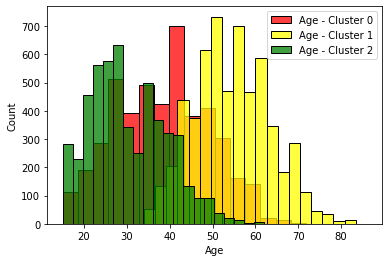

In [114]:
sns.histplot(clients0['Age'], color = 'red', label = 'Age - Cluster 0', bins = 20)
sns.histplot(clients1['Age'], color = 'yellow', label = 'Age - Cluster 1', bins = 20)
sns.histplot(clients2['Age'], color = 'green', label = 'Age - Cluster 2', bins = 20)
plt.legend()

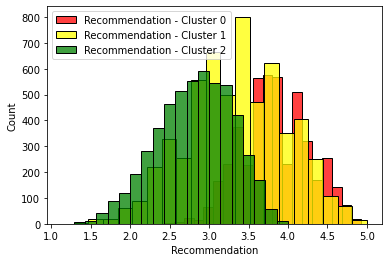

In [115]:
sns.histplot(clients0['Recommendation'], color = 'red', label = 'Recommendation - Cluster 0', bins = 20)
sns.histplot(clients1['Recommendation'], color = 'yellow', label = 'Recommendation - Cluster 1', bins = 20)
sns.histplot(clients2['Recommendation'], color = 'green', label = 'Recommendation - Cluster 2', bins = 20)
plt.legend()

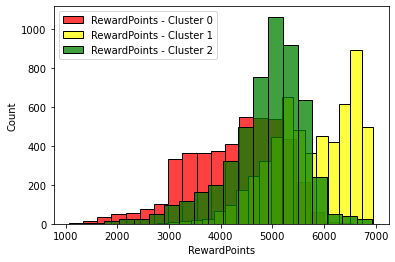

In [116]:
sns.histplot(clients0['RewardPoints'], color = 'red', label = 'RewardPoints - Cluster 0', bins = 20)
sns.histplot(clients1['RewardPoints'], color = 'yellow', label = 'RewardPoints - Cluster 1', bins = 20)
sns.histplot(clients2['RewardPoints'], color = 'green', label = 'RewardPoints - Cluster 2', bins = 20)
plt.legend()

<a id='clustersurvey'></a>
#### Client Survey Perspective

In [117]:
survey0_graf = df_final[['Comfort', 'Location', 'Wifi', 'Staff', 'OnlineBooking', 'PriceQuality','label_2']]

In [118]:
survey0_graf.groupby(['label_2']).mean().transpose()

label_2,0,1,2
Comfort,2.429606,3.844857,1.982277
Location,3.031244,3.911467,1.685526
Wifi,2.154125,3.789713,3.796864
Staff,2.182511,4.184823,4.171325
OnlineBooking,2.094685,4.185835,4.090207
PriceQuality,2.772528,3.825295,3.787094


[Text(0.5, 1.0, 'Survey Kmeans Clustering Using k=3: Cluster 0')]

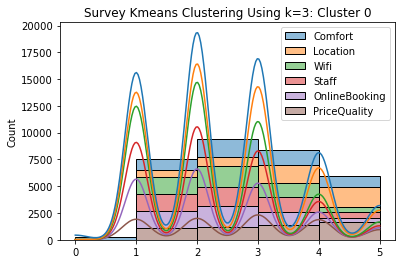

In [119]:
survey0_his = survey0_graf[survey0_graf.label_2 == 0]
del survey0_his['label_2']
sns.histplot(data= survey0_his, multiple="stack", bins=5, kde=True).set(title='Survey Kmeans Clustering Using k=3: Cluster 0')

[Text(0.5, 1.0, 'Survey Kmeans Clustering Using k=3: Cluster 1')]

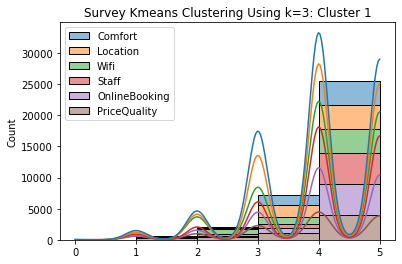

In [120]:
survey1_his = survey0_graf[survey0_graf.label_2 == 1]
del survey1_his['label_2']
sns.histplot(data= survey1_his, multiple="stack", bins=5, kde=True).set(title='Survey Kmeans Clustering Using k=3: Cluster 1')

[Text(0.5, 1.0, 'Survey Kmeans Clustering Using k=3: Cluster 2')]

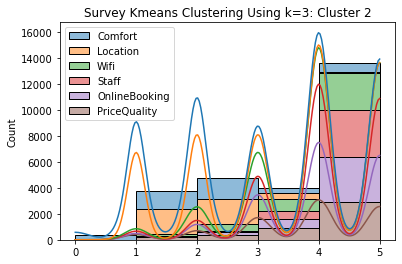

In [121]:
survey2_his = survey0_graf[survey0_graf.label_2 == 2]
del survey2_his['label_2']
sns.histplot(data= survey2_his, multiple="stack", bins=5, kde=True).set(title='Survey Kmeans Clustering Using k=3: Cluster 2')

#### Cluster Survey 0 details

In [122]:
cluster0_demo = Survey_k3[Survey_k3.label_2 == 0]
cluster1_demo = Survey_k3[Survey_k3.label_2 == 1]
cluster2_demo = Survey_k3[Survey_k3.label_2 == 2]

In [123]:
#print('***Descriptive Summary of Categorical variables***')
#print(cluster0_demo.describe())
print(' ')
print('***Frequency for each survey***')
print('***Comfort***')
print(cluster0_demo['Comfort'].value_counts()/len(cluster0_demo)*100)
print('***Location***')
print(cluster0_demo['Location'].value_counts()/len(cluster0_demo)*100)
print('***Wifi***')
print(cluster0_demo['Wifi'].value_counts()/len(cluster0_demo)*100)
print('***Staff***')
print(cluster0_demo['Staff'].value_counts()/len(cluster0_demo)*100)
print('***OnlineBooking***')
print(cluster0_demo['OnlineBooking'].value_counts()/len(cluster0_demo)*100)
print('***PriceQuality***')
print(cluster0_demo['PriceQuality'].value_counts()/len(cluster0_demo)*100)


 
***Frequency for each survey***
***Comfort***
0.4    30.329587
0.6    27.148028
0.2    19.051248
0.8    14.688512
1.0     4.610402
0.0     4.172223
Name: Comfort, dtype: float64
***Location***
0.50    33.130120
0.75    25.033340
0.25    17.489046
0.00    13.278720
1.00    11.068775
Name: Location, dtype: float64
***Wifi***
0.4    36.635550
0.2    29.758049
0.6    24.195085
0.8     6.020194
1.0     3.143456
0.0     0.247666
Name: Wifi, dtype: float64
***Staff***
0.25    34.044580
0.00    29.738998
0.50    26.062107
0.75     8.534959
1.00     1.619356
Name: Staff, dtype: float64
***OnlineBooking***
0.4    37.816727
0.2    30.634407
0.6    24.271290
0.8     5.810631
1.0     1.428844
0.0     0.038102
Name: OnlineBooking, dtype: float64
***PriceQuality***
0.50    25.623928
0.25    22.061345
0.00    21.146885
0.75    20.727758
1.00    10.440084
Name: PriceQuality, dtype: float64


In [124]:
#print('***Descriptive Summary of Categorical variables***')
#print(cluster0_demo.describe())
print(' ')
print('***Frequency for each survey***')
print('***Comfort***')
print(cluster1_demo['Comfort'].value_counts()/len(cluster1_demo)*100)
print('***Location***')
print(cluster1_demo['Location'].value_counts()/len(cluster1_demo)*100)
print('***Wifi***')
print(cluster1_demo['Wifi'].value_counts()/len(cluster1_demo)*100)
print('***Staff***')
print(cluster1_demo['Staff'].value_counts()/len(cluster1_demo)*100)
print('***OnlineBooking***')
print(cluster1_demo['OnlineBooking'].value_counts()/len(cluster1_demo)*100)
print('***PriceQuality***')
print(cluster1_demo['PriceQuality'].value_counts()/len(cluster1_demo)*100)

 
***Frequency for each survey***
***Comfort***
0.8    36.458685
1.0    28.701518
0.6    28.499157
0.4     3.743676
0.2     2.158516
0.0     0.438449
Name: Comfort, dtype: float64
***Location***
0.75    37.436762
0.50    31.736931
1.00    28.178752
0.25     2.647555
Name: Location, dtype: float64
***Wifi***
0.8    33.591906
1.0    31.618887
0.6    19.224283
0.4    13.288364
0.2     2.259696
0.0     0.016863
Name: Wifi, dtype: float64
***Staff***
0.75    42.967960
1.00    41.129848
0.50    10.893761
0.25     3.271501
0.00     1.736931
Name: Staff, dtype: float64
***OnlineBooking***
0.8    43.271501
1.0    39.763912
0.6    13.119730
0.4     3.473862
0.2     0.370995
Name: OnlineBooking, dtype: float64
***PriceQuality***
0.75    36.728499
1.00    31.703204
0.50    18.718381
0.25     8.094435
0.00     4.755481
Name: PriceQuality, dtype: float64


In [125]:
#print('***Descriptive Summary of Categorical variables***')
#print(cluster0_demo.describe())
print(' ')
print('***Frequency for each survey***')
print('***Comfort***')
print(cluster2_demo['Comfort'].value_counts()/len(cluster2_demo)*100)
print('***Location***')
print(cluster2_demo['Location'].value_counts()/len(cluster2_demo)*100)
print('***Wifi***')
print(cluster2_demo['Wifi'].value_counts()/len(cluster2_demo)*100)
print('***Staff***')
print(cluster2_demo['Staff'].value_counts()/len(cluster2_demo)*100)
print('***OnlineBooking***')
print(cluster2_demo['OnlineBooking'].value_counts()/len(cluster2_demo)*100)
print('***PriceQuality***')
print(cluster2_demo['PriceQuality'].value_counts()/len(cluster2_demo)*100)

 
***Frequency for each survey***
***Comfort***
0.4    37.150648
0.2    30.833901
0.8    12.315383
0.6     8.702568
0.0     7.452852
1.0     3.544649
Name: Comfort, dtype: float64
***Location***
0.00    45.194274
0.25    42.694842
0.50    10.474892
0.75     1.635992
Name: Location, dtype: float64
***Wifi***
0.8    32.469893
1.0    31.924563
0.6    21.267894
0.4    12.110884
0.2     2.158600
0.0     0.068166
Name: Wifi, dtype: float64
***Staff***
0.75    41.649625
1.00    40.718019
0.50    13.224267
0.25     2.862986
0.00     1.545103
Name: Staff, dtype: float64
***OnlineBooking***
0.8    41.445126
1.0    36.809816
0.6    16.450807
0.4     4.544422
0.2     0.749830
Name: OnlineBooking, dtype: float64
***PriceQuality***
0.75    36.287207
1.00    30.288571
0.50    20.199955
0.25     8.293570
0.00     4.930698
Name: PriceQuality, dtype: float64


In [126]:
df_survey_view = df_final[['Age', 'Gender', 'd_Longevity', 'd_Single', 'd_Double', 'd_Churn', 'd_TypeTravel', 'RewardPoints', 'Recommendation', 'label_2']]
survey0 = df_survey_view[df_survey_view.label_2 == 0]
survey1 = df_survey_view[df_survey_view.label_2 == 1]
survey2 = df_survey_view[df_survey_view.label_2 == 2]

In [127]:
df_survey_view2= df_final[['ReceptionSchedule', 'FoodDrink','Amenities','RoomSpace', 'CheckOut','Checkin', 'Cleanliness', 'BarService','label_2']]
survey0_2 = df_survey_view2[df_survey_view2.label_2 == 0]
survey1_2 = df_survey_view2[df_survey_view2.label_2 == 1]
survey2_2 = df_survey_view2[df_survey_view2.label_2 == 2]

In [128]:
print(' ')
print('ReceptionSchedule')
print(survey0_2['ReceptionSchedule'].mean())
print(survey1_2['ReceptionSchedule'].mean())
print(survey2_2['ReceptionSchedule'].mean())

print(' ')
print('FoodDrink')
print(survey0_2['FoodDrink'].mean())
print(survey1_2['FoodDrink'].mean())
print(survey2_2['FoodDrink'].mean())

print(' ')
print('Amenities')
print(survey0_2['ReceptionSchedule'].mean())
print(survey1_2['ReceptionSchedule'].mean())
print(survey2_2['ReceptionSchedule'].mean())

print(' ')
print('RoomSpace')
print(survey0_2['RoomSpace'].mean())
print(survey1_2['RoomSpace'].mean())
print(survey2_2['RoomSpace'].mean())

print(' ')
print('CheckOut')
print(survey0_2['CheckOut'].mean())
print(survey1_2['CheckOut'].mean())
print(survey2_2['CheckOut'].mean())

print(' ')
print('Checkin')
print(survey0_2['Checkin'].mean())
print(survey1_2['Checkin'].mean())
print(survey2_2['Checkin'].mean())

print(' ')
print('Cleanliness')
print(survey0_2['Cleanliness'].mean())
print(survey1_2['Cleanliness'].mean())
print(survey2_2['Cleanliness'].mean())
                
                
print(' ')
print('BarService')
print(survey0_2['BarService'].mean())
print(survey1_2['BarService'].mean())
print(survey2_2['BarService'].mean())

 
ReceptionSchedule
2.9750428653076777
3.7200674536256324
2.0495341967734606
 
FoodDrink
2.735949704705658
3.6924114671163575
1.833219722790275
 
Amenities
2.9750428653076777
3.7200674536256324
2.0495341967734606
 
RoomSpace
2.9992379500857305
3.751602023608769
3.6550783912747105
 
CheckOut
3.2670984949514192
3.945025295109612
3.887980004544422
 
Checkin
2.955420080015241
3.5077571669477234
3.5282890252215404
 
Cleanliness
3.2429034101733665
3.9495784148397974
3.8820722563053853
 
BarService
2.209182701466946
3.93929173693086
3.9077482390365827


In [129]:
print('Descriptive Summary of Categorical variables')
print(survey0.describe())

print(' ')
print('Frequency for each level of Churn Rate')
print(survey0['d_Churn'].value_counts()/len(survey0))

print(' ')
print('Frequency for each level of Type of Travel')
print(survey0['d_TypeTravel'].value_counts()/len(survey0))

print(' ')
print('Frequency of single room')
print(survey0['d_Single'].sum()/len(survey0)*100)

print(' ')
print('Frequency  of double room')
print(survey0['d_Double'].sum()/len(survey0)*100)

print(' ')
print('Frequency of suite room')
print(100-((survey0['d_Double'].sum()+survey0['d_Single'].sum())/len(survey0)*100))
 
print(' ')
print('Frequency for each level of Longevity')
print(survey0['d_Longevity'].value_counts()/len(survey0))

print('Median of RewardPoints')
print(survey0['RewardPoints'].median())

print(' ')
print('Mean of Age')
print(survey0['Age'].mean())

print(' ')
print('Frequency for each level of Gender')
print(survey0['Gender'].value_counts()/len(survey0))

print(' ')
print('Mean of Recommendation')
print(survey0['Recommendation'].mean())

Descriptive Summary of Categorical variables
               Age       Gender  d_Longevity     d_Single     d_Double  \
count  5249.000000  5249.000000  5249.000000  5249.000000  5249.000000   
mean     39.664508     0.450562     0.715755     0.355306     0.553629   
std      14.565154     0.497597     0.451097     0.478651     0.497163   
min      15.000000     0.000000     0.000000     0.000000     0.000000   
25%      27.000000     0.000000     0.000000     0.000000     0.000000   
50%      38.000000     0.000000     1.000000     0.000000     1.000000   
75%      50.000000     1.000000     1.000000     1.000000     1.000000   
max      86.000000     1.000000     1.000000     1.000000     1.000000   

           d_Churn  d_TypeTravel  RewardPoints  Recommendation  label_2  
count  5249.000000   5249.000000   5249.000000     5249.000000   5249.0  
mean      0.789103      0.681654   4962.766813        2.691438      0.0  
std       0.407984      0.465879    957.384618        0.466771    

In [130]:
print('Descriptive Summary of Categorical variables')
print(survey1.describe())

print(' ')
print('Frequency for each level of Churn Rate')
print(survey1['d_Churn'].value_counts()/len(survey1))

print(' ')
print('Frequency for each level of Type of Travel')
print(survey1['d_TypeTravel'].value_counts()/len(survey1))

print(' ')
print('Frequency of single room')
print(survey1['d_Single'].sum()/len(survey1)*100)

print(' ')
print('Frequency  of double room')
print(survey1['d_Double'].sum()/len(survey1)*100)

print(' ')
print('Frequency of suite room')
print(100-((survey1['d_Double'].sum()+survey1['d_Single'].sum())/len(survey1)*100))

print(' ')
print('Frequency for each level of Longevity')
print(survey1['d_Longevity'].value_counts()/len(survey1))

print(' ')
print('Median of RewardPoints')
print(survey1['RewardPoints'].median())

print(' ')
print('Mean of Age')
print(survey1['Age'].mean())

print(' ')
print('Frequency for each level of Gender')
print(survey1['Gender'].value_counts()/len(survey1))

print(' ')
print('Mean of Recommendation')
print(survey1['Recommendation'].mean())

Descriptive Summary of Categorical variables
               Age       Gender  d_Longevity     d_Single     d_Double  \
count  5930.000000  5930.000000  5930.000000  5930.000000  5930.000000   
mean     42.629005     0.554637     0.872513     0.532378     0.402698   
std      13.548112     0.497048     0.333546     0.498993     0.490482   
min      15.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     0.000000     1.000000     0.000000     0.000000   
50%      43.000000     1.000000     1.000000     1.000000     0.000000   
75%      53.000000     1.000000     1.000000     1.000000     1.000000   
max      81.000000     1.000000     1.000000     1.000000     1.000000   

           d_Churn  d_TypeTravel  RewardPoints  Recommendation  label_2  
count  5930.000000   5930.000000   5930.000000     5930.000000   5930.0  
mean      0.258179      0.700000   5068.263406        3.869357      1.0  
std       0.437670      0.458296   1070.170082        0.437888    

In [131]:
print('Descriptive Summary of Categorical variables')
print(survey2.describe())

print(' ')
print('Frequency for each level of Churn Rate')
print(survey2['d_Churn'].value_counts()/len(survey2))

print(' ')
print('Frequency for each level of Type of Travel')
print(survey2['d_TypeTravel'].value_counts()/len(survey2))

print(' ')
print('Frequency of single room')
print(survey2['d_Single'].sum()/len(survey2)*100)

print(' ')
print('Frequency  of double room')
print(survey2['d_Double'].sum()/len(survey2)*100)

print(' ')
print('Frequency of suite room')
print(100-((survey2['d_Double'].sum()+survey2['d_Single'].sum())/len(survey2)*100))

print(' ')
print('Frequency for each level of Longevity')
print(survey2['d_Longevity'].value_counts()/len(survey2))

print(' ')
print('Median of RewardPoints')
print(survey2['RewardPoints'].median())

print(' ')
print('Mean of Age')
print(survey2['Age'].mean())

print(' ')
print('Frequency for each level of Gender')
print(survey2['Gender'].value_counts()/len(survey2))

print(' ')
print('Mean of Recommendation')
print(survey2['Recommendation'].mean())

Descriptive Summary of Categorical variables
               Age       Gender  d_Longevity     d_Single     d_Double  \
count  4401.000000  4401.000000  4401.000000  4401.000000  4401.000000   
mean     42.392184     0.528289     0.857987     0.548966     0.391502   
std      13.494840     0.499256     0.349103     0.497653     0.488142   
min      15.000000     0.000000     0.000000     0.000000     0.000000   
25%      31.000000     0.000000     1.000000     0.000000     0.000000   
50%      43.000000     1.000000     1.000000     1.000000     0.000000   
75%      53.000000     1.000000     1.000000     1.000000     1.000000   
max      86.000000     1.000000     1.000000     1.000000     1.000000   

           d_Churn  d_TypeTravel  RewardPoints  Recommendation  label_2  
count  4401.000000   4401.000000   4401.000000     4401.000000   4401.0  
mean      0.326289      0.686435   5037.819814        3.269955      2.0  
std       0.468908      0.463995   1035.485890        0.431135    

In [132]:
df_survey_view.groupby(['label_2']).mean().transpose()

label_2,0,1,2
Age,39.664508,42.629005,42.392184
Gender,0.450562,0.554637,0.528289
d_Longevity,0.715755,0.872513,0.857987
d_Single,0.355306,0.532378,0.548966
d_Double,0.553629,0.402698,0.391502
d_Churn,0.789103,0.258179,0.326289
d_TypeTravel,0.681654,0.700000,0.686435
RewardPoints,4962.766813,5068.263406,5037.819814
Recommendation,2.691438,3.869357,3.269955


In [133]:
df_survey_view2= df_final[['ReceptionSchedule', 'FoodDrink','Amenities','RoomSpace', 'CheckOut','Checkin', 'Cleanliness', 'BarService','label_2']]

In [134]:
df_survey_view2.groupby(['label_2']).mean().transpose()

label_2,0,1,2
ReceptionSchedule,2.975043,3.720067,2.049534
FoodDrink,2.735950,3.692411,1.833220
Amenities,2.630596,3.923272,3.522154
RoomSpace,2.999238,3.751602,3.655078
CheckOut,3.267098,3.945025,3.887980
Checkin,2.955420,3.507757,3.528289
Cleanliness,3.242903,3.949578,3.882072
BarService,2.209183,3.939292,3.907748


In [135]:
df_final['label_2'].value_counts()

1    5930
0    5249
2    4401
Name: label_2, dtype: int64

[BACK TO ÍNDICE](#indi)
<a id='cluster3'></a>
### 5.3. Other Clustering Techniques

<a id='cluster4'></a>
#### 5.3.1 Ward Method

In [136]:
import scipy.cluster.hierarchy as sch

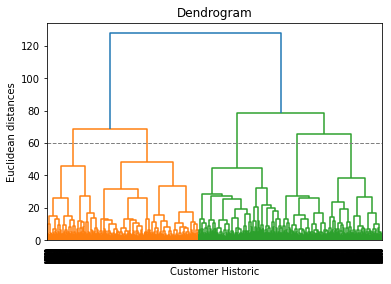

In [137]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customer Historic')
plt.ylabel('Euclidean distances')
plt.axhline(y = 60, c = 'grey', lw = 1, linestyle = 'dashed')
plt.show()

Using k = 5

> **Ward** method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster. Below is the dendrogram diagram.
https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318

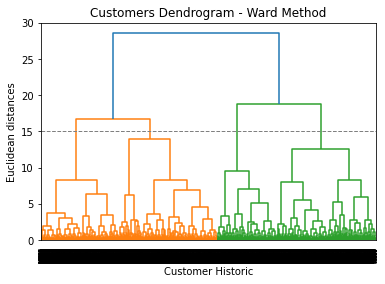

In [138]:
dendrogram = sch.dendrogram(sch.linkage(df_client, method  = "ward"))
plt.title('Customers Dendrogram - Ward Method')
plt.xlabel('Customer Historic')
plt.ylabel('Euclidean distances')
plt.axhline(y=15, c='grey', lw=1, linestyle='dashed')
plt.show()

> **Customer**: Ward Clustering Using k= 4

> Analysing the Customer dendogram, return k = 4 as follow's the highest linkage

In [139]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [140]:
y_hc = hc.fit_predict(df_client)

In [141]:
y_hc_pd = pd.DataFrame(y_hc)
y_hc_pd.columns = ['label']
y_hc_pd = pd.concat([df_client, y_hc_pd], axis = 1)

In [142]:
y_hc_pd.groupby(['label']).mean().transpose()

label,0,1,2,3
RewardPoints,0.588386,0.604082,0.916776,0.679965
Recommendation,0.658537,0.543743,0.604996,0.423395
Age,0.258946,0.549017,0.519903,0.187994


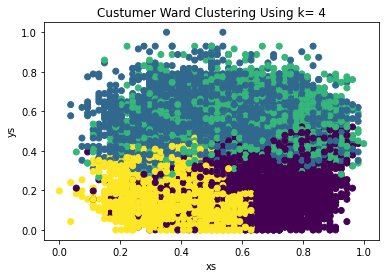

In [143]:
xs = y_hc_pd.iloc[:,1]
ys = y_hc_pd.iloc[:,2]

plt.scatter(xs, ys, c = y_hc_pd['label'])
plt.title('Custumer Ward Clustering Using k= 4')
plt.xlabel('xs')
plt.ylabel('ys')
plt.show()

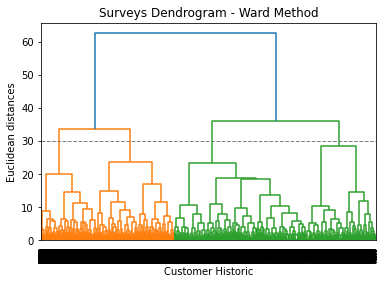

In [144]:
dendrogram = sch.dendrogram(sch.linkage(Survey, method  = "ward"))
plt.title('Surveys Dendrogram - Ward Method')
plt.xlabel('Customer Historic')
plt.ylabel('Euclidean distances')
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.show()

> Analysing the Survey dendogram, return k = 4 as follow's the highest linkage

In [145]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [146]:
y_hc=hc.fit_predict(Survey)

In [147]:
y_hc_pd = pd.DataFrame(y_hc)
y_hc_pd.columns = ['label']
y_hc_pd = pd.concat([Survey, y_hc_pd], axis = 1)

In [148]:
y_hc_pd.groupby(['label']).mean().transpose()

label,0,1,2,3
Comfort,0.452349,0.537266,0.699869,0.445750
Location,0.237176,0.445562,0.660534,0.503961
Wifi,0.846044,0.462734,0.700098,0.537558
Staff,0.876931,0.213616,0.794713,0.494494
OnlineBooking,0.885847,0.511852,0.816188,0.401236
PriceQuality,0.592939,0.680265,0.777374,0.166345


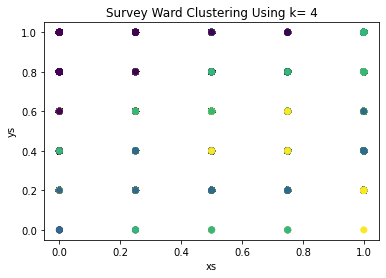

In [149]:
xs = y_hc_pd.iloc[:,1]
ys = y_hc_pd.iloc[:,2]

plt.scatter(xs, ys, c = y_hc_pd['label'])
plt.title('Survey Ward Clustering Using k= 4')
plt.xlabel('xs')
plt.ylabel('ys')
plt.show()

In [150]:
y_hc_pd_0 = y_hc_pd[y_hc_pd.label==0]
y_hc_pd_1 = y_hc_pd[y_hc_pd.label==1]
y_hc_pd_2 = y_hc_pd[y_hc_pd.label==2]
y_hc_pd_3 = y_hc_pd[y_hc_pd.label==3]
del y_hc_pd_0['label']
del y_hc_pd_1['label']
del y_hc_pd_2['label']
del y_hc_pd_3['label']

<AxesSubplot:ylabel='Count'>

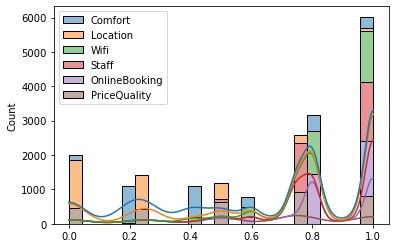

In [151]:
# Survey Ward Clustering Using k= 0 layer", "dodge", "stack", "fill"
sns.histplot(data=y_hc_pd_0, multiple="stack",  kde=True)

<AxesSubplot:ylabel='Count'>

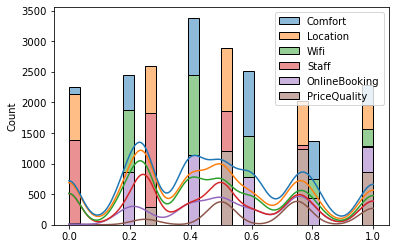

In [152]:
# Survey Ward Clustering Using k= 1
sns.histplot(data=y_hc_pd_1,  multiple="stack", kde=True)

<AxesSubplot:ylabel='Count'>

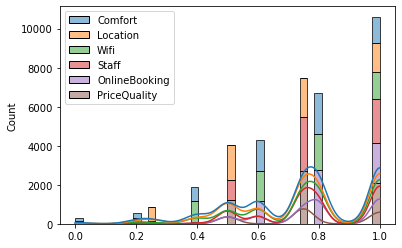

In [153]:
# Survey Ward Clustering Using k= 2
sns.histplot(data=y_hc_pd_2,  multiple="stack", kde=True)

<AxesSubplot:ylabel='Count'>

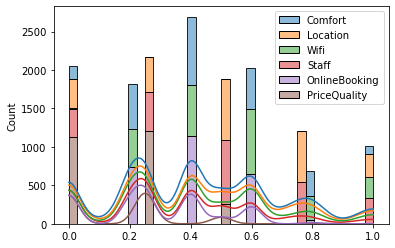

In [154]:
# Survey Ward Clustering Using k= 3
sns.histplot(data=y_hc_pd_3,  multiple="stack", kde=True)

[BACK TO ÍNDICE](#indi)
<a id='pca'></a>
### 5.4. Principal Component Analysis

In [155]:
survey = df[['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking',
               'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']]
survey.head()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
BookingID,,,,,,,,,,,,,,
0,3,4,1,4,4,3,4,3,3,3,3,4,3,4
1,1,1,1,1,5,3,4,5,5,5,5,1,5,2
2,3,3,3,3,1,4,4,3,3,2,3,2,3,1
3,1,1,1,1,4,4,5,4,4,4,4,4,4,3
4,2,2,3,2,5,5,5,5,5,3,4,1,3,5


In [156]:
survey.shape

(15580, 14)

In [157]:
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing 

In [158]:
pca = PCA()
pca.fit(survey)
pca_data = pca.transform(survey)

In [159]:
pca_data.shape

(15580, 14)

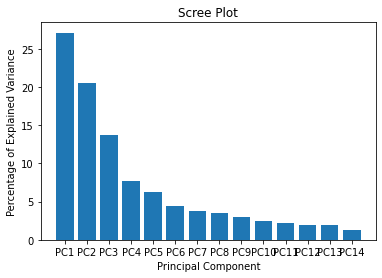

In [160]:
#Calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

#labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

#creating a matplot with matplotlib
plt.bar(x=range(1,len(per_var)+1), height= per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

The Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one while preserving most of the information in the large set.

It is crucial to standardize every vriable before applying the PCA, given that this method is very sensitive to the variances of the initial variables.

After obtaining the covariance matix of surveys' features, one must compute the Eigenvectors and eigenvalues, these will allow us to the principal components of the data. This means that PCA tries to put maximum possible information in the first component, PC1, then maximum remaining information in PC2, etc.

In our screen plot we can see that the first 5 principal components account for x% of our information.

The next step would be to apply k-means on this PCAs.